In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline
%run function.ipynb

df = pd.read_csv('clean8.csv')
df_copy = df.copy()
print(df_copy.shape)
df_copy.head(3)

(855794, 54)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,ApprovalDate,Term,NoEmp,...,USDPerJobCreated,loan_marturity_date,Is_Cross_State,Appv_Dusburse_delta,Default%,RealEstate,GreatRecession,DotCom,Recession,Mon_Is_14710
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,1997-02-28,84.0,4.0,...,NaN,2004-02-28,1,730.0,NaN,0.0,0.0,0.0,0.0,0.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,1997-02-28,60.0,2.0,...,NaN,2002-02-28,0,92.0,NaN,0.0,0.0,0.0,0.0,0.0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,1997-02-28,180.0,7.0,...,NaN,2012-02-28,0,306.0,NaN,0.0,0.0,0.0,0.0,0.0


In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df_copy = df_copy[(df_copy['DisbursementDate_year'] >= 2000) & (df_copy['DisbursementDate_year'] <= 2010)]
print(df_copy.shape)
df_copy.head(3)

(530453, 54)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,ApprovalDate,Term,NoEmp,...,USDPerJobCreated,loan_marturity_date,Is_Cross_State,Appv_Dusburse_delta,Default%,RealEstate,GreatRecession,DotCom,Recession,Mon_Is_14710
12,1000146010,CARVEL,APEX,NC,27502,STEARNS BK NATL ASSOC,MN,2006-02-07,162.000,2.000,...,NaN,2019-08-07,1,52.000,NaN,0.000,0.000,0.000,0.000,0.000
24,1000446006,SUBWAY,LITTLE ROCK,AR,72223,HOPE FCU,MS,2006-02-07,126.000,7.000,...,NaN,2016-08-07,1,82.000,NaN,0.000,0.000,0.000,0.000,1.000
28,1000506000,WEYLAND CORPORATION,CAMARILLO,CA,93010,WELLS FARGO BANK NATL ASSOC,SD,2006-02-07,83.000,18.000,...,106321.347,2013-01-07,1,21.000,NaN,0.000,0.000,0.000,0.000,0.000


In [4]:
df_copy['DisbursePerMonth'] = df_copy['DisbursementGross'] / df_copy['Term']
df_copy['BankLoss'] = df_copy['ChgOffPrinGr'] - df_copy['SBA_Appv']
df_copy.loc[list(df_copy[df_copy['BankLoss'] < 0].index), 'BankLoss'] = 0
df_copy['BankLoss%'] = df_copy['BankLoss'] / df_copy['DisbursementGross'] * 100
df_copy['Job'] = df_copy['CreateJob'] + df_copy['RetainedJob']

In [62]:
df_copy['SBALoss'] = df_copy['ChgOffPrinGr'] - df_copy['BankLoss']

In [5]:
# df_copy.to_csv('clean9.csv', index=False)

In [63]:
obj_features = ['State', 'BankState', 'NewExist', 'Bank', 'IsFranchised', 'UrbanRural', 'RevLineCr', 'LowDoc', 'Industry',
                'ApprovalDate_year', 'ApprovalDate_month', 'DisbursementDate_year', 'DisbursementDate_month', 'State_division', 'RealEstate',
                'GreatRecession', 'DotCom', 'Recession', 'Mon_Is_14710', 'Is_Cross_State']
num_features = ['Default', 'ChgOffPrinGr', 'Term', 'DisbursementGross', 'Bank%', 'DisbursePerEmployee', 'BankLoss', 'BankLoss%', 'Job',
                'USDPerJobCreated','NoEmp', 'CreateJob', 'RetainedJob', 'Population', 'PopDensity', 'GrAppv', 'SBA_Appv', 'Default%',
                'HousingUnits', 'OccupiedHousingUnits', 'MedianHomeValue', 'MedianHouseholdIncome', 'Appv_Dusburse_delta', 'DisbursePerMonth', 'SBALoss']
time_cols = ['ApprovalDate_year', 'ApprovalDate_month', 'DisbursementDate_year', 'DisbursementDate_month']

df_groupby_mean = dict()
df_groupby_size = dict()
df_groupby_sum = dict()

for col in obj_features:
    df_groupby_mean[col] = df_copy.groupby(by=col).mean()[num_features]
    df_groupby_sum[col] = df_copy.groupby(by=col).sum()[num_features]
    df_groupby_size[col] = pd.DataFrame(df_copy.groupby(by=col).size())
    df_groupby_size[col].rename(columns={0: 'size'}, inplace=True)

In [7]:
display(df_copy.iloc[:3,:23])
display(df_copy.iloc[:3,23:])

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,ApprovalDate,Term,NoEmp,...,IsFranchised,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,Default,ChgOffPrinGr
12,1000146010,CARVEL,APEX,NC,27502,STEARNS BK NATL ASSOC,MN,2006-02-07,162.000,2.000,...,1.000,1,0.000,0.000,NaN,2006-03-31,307175.719,0.000,0.000,NaN
24,1000446006,SUBWAY,LITTLE ROCK,AR,72223,HOPE FCU,MS,2006-02-07,126.000,7.000,...,0.000,1,0.000,0.000,NaN,2006-04-30,166437.357,0.000,0.000,NaN
28,1000506000,WEYLAND CORPORATION,CAMARILLO,CA,93010,WELLS FARGO BANK NATL ASSOC,SD,2006-02-07,83.000,18.000,...,0.000,1,1.000,0.000,NaN,2006-02-28,531606.737,0.000,0.000,NaN


,GrAppv,SBA_Appv,Industry,ChgOffDate_year,ChgOffDate_month,ChgOffDate_day,DisbursementDate_year,DisbursementDate_month,DisbursementDate_day,ApprovalDate_year,...,Default%,RealEstate,GreatRecession,DotCom,Recession,Mon_Is_14710,DisbursePerMonth,BankLoss,BankLoss%,Job
12,307175.719,230381.789,Retail_trade,NaN,NaN,NaN,2006.000,3.000,31.000,2006.000,...,NaN,0.000,0.000,0.000,0.000,0.000,1896.146,NaN,NaN,0.000
24,166437.357,141471.753,Accom/Food_serv,NaN,NaN,NaN,2006.000,4.000,30.000,2006.000,...,NaN,0.000,0.000,0.000,0.000,1.000,1320.931,NaN,NaN,0.000
28,121221.673,60610.836,Educational,NaN,NaN,NaN,2006.000,2.000,28.000,2006.000,...,NaN,0.000,0.000,0.000,0.000,0.000,6404.900,NaN,NaN,28.000


In [8]:
# num = 'Default'
# for i in range(len(obj_features)):
#     if df_copy[obj_features[i]].nunique() < 8:
#             plt.figure(figsize=(10, 10))
#     elif obj_features[i] == 'Industry':
#         plt.figure(figsize=(20, 15))
#         vis = df_groupby_mean[obj_features[i]].sort_values(by=num, ascending=False)
#         title = 'Mean Default by '+ obj_features[i]
#         plt.title(title)
#         sns.set_theme(style="darkgrid")
#         plt.grid(True)
#         sns.barplot(y=vis.index, x=vis[num])
#         plt.savefig(title + '.jpeg')
#         plt.show()
#         continue
#     else:
#         plt.figure(figsize=(20, 10))
#     vis = df_groupby_mean[obj_features[i]].sort_values(by=num, ascending=False)
#     title = 'Mean Default by '+ obj_features[i]
#     plt.title(title)
#     sns.set_theme(style="darkgrid")
#     plt.grid(True)
#     sns.barplot(x=vis.index, y=vis[num])
#     plt.savefig(title + '.jpeg')
#     plt.show()

D:\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


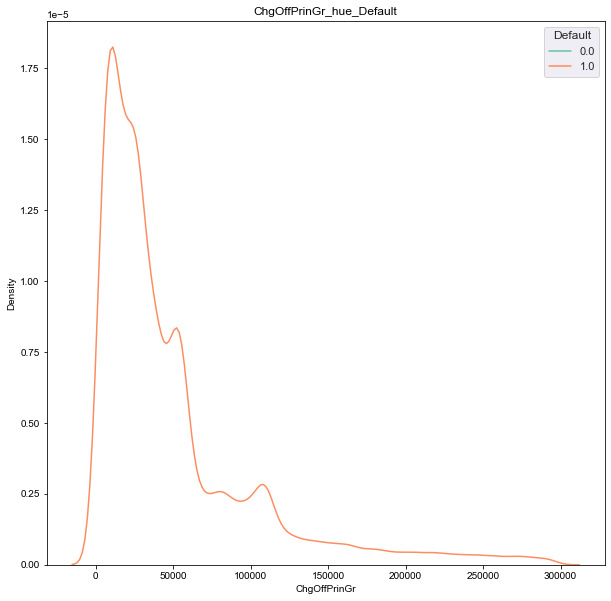

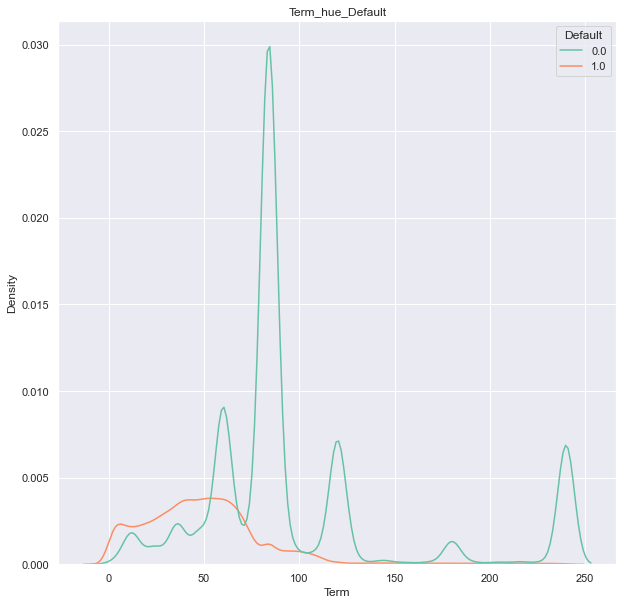

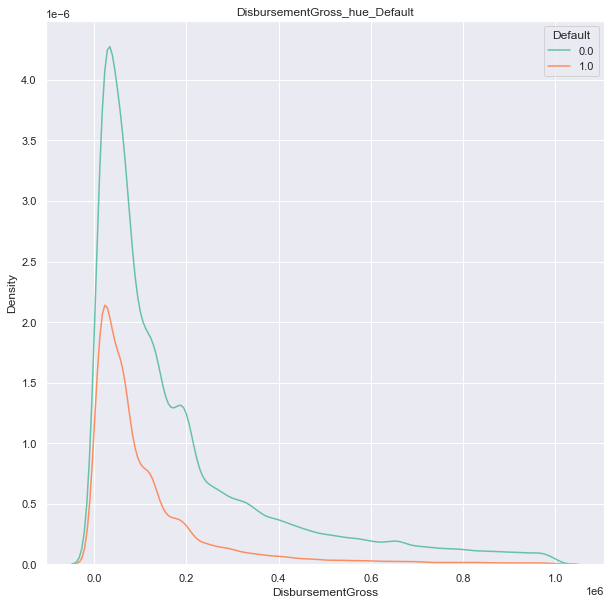

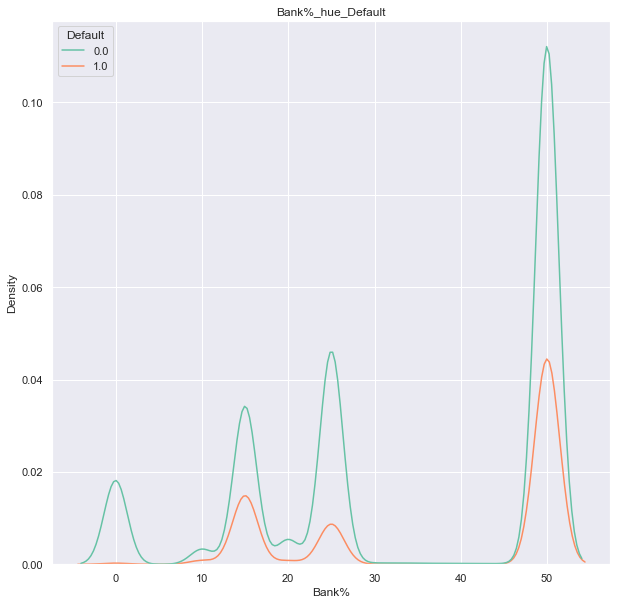

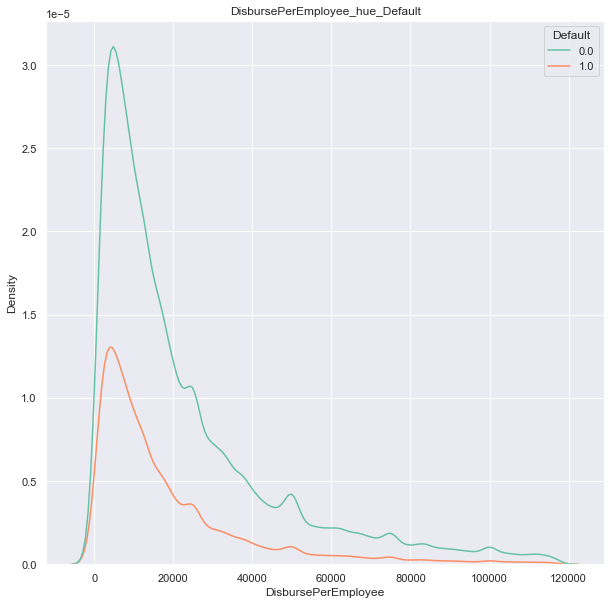

D:\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


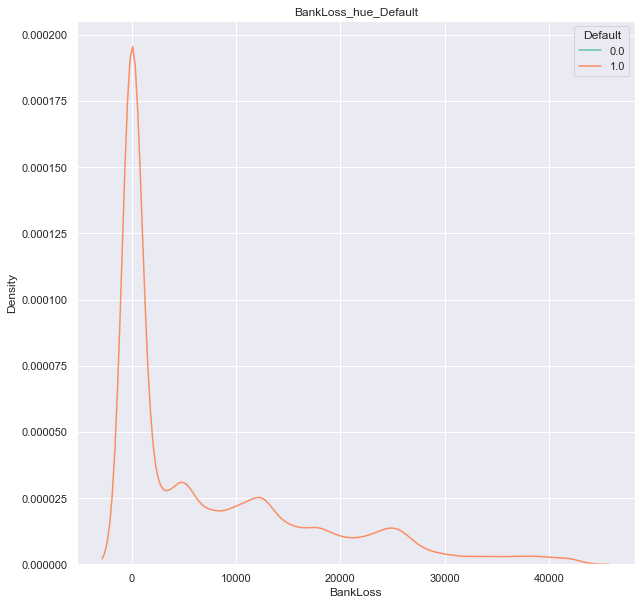

D:\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


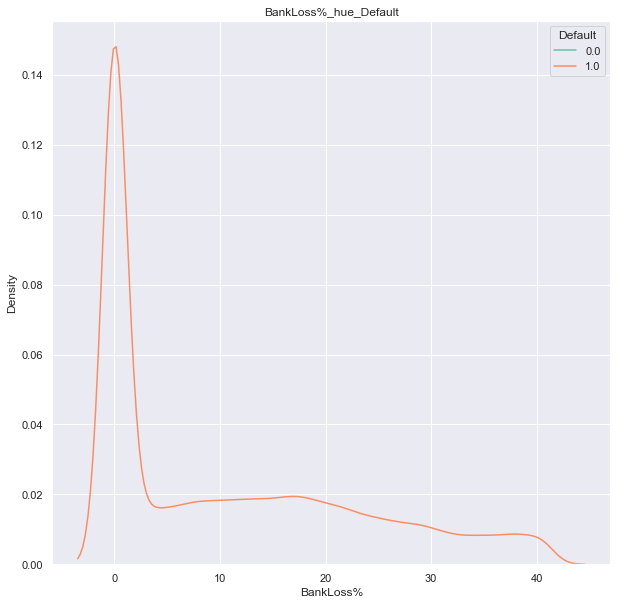

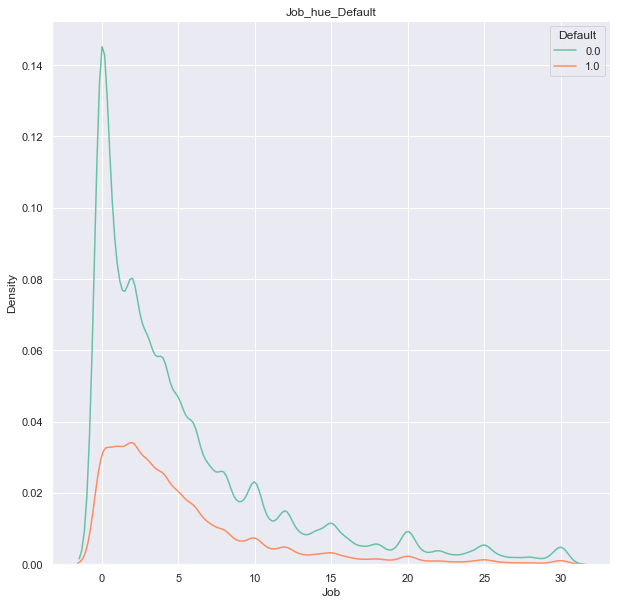

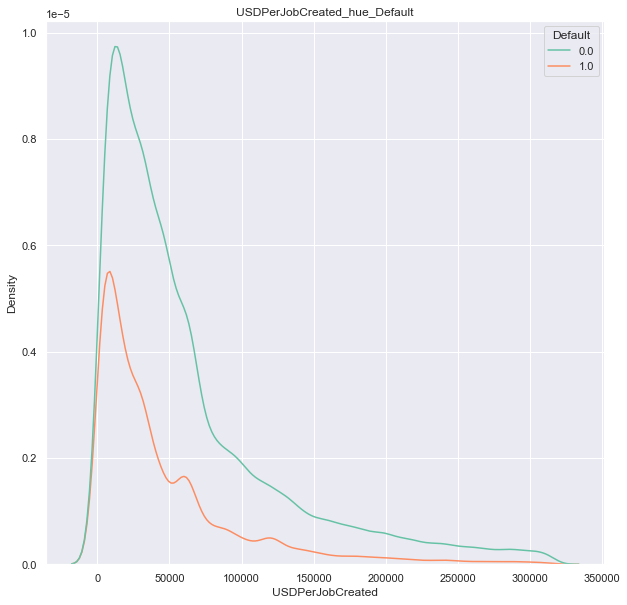

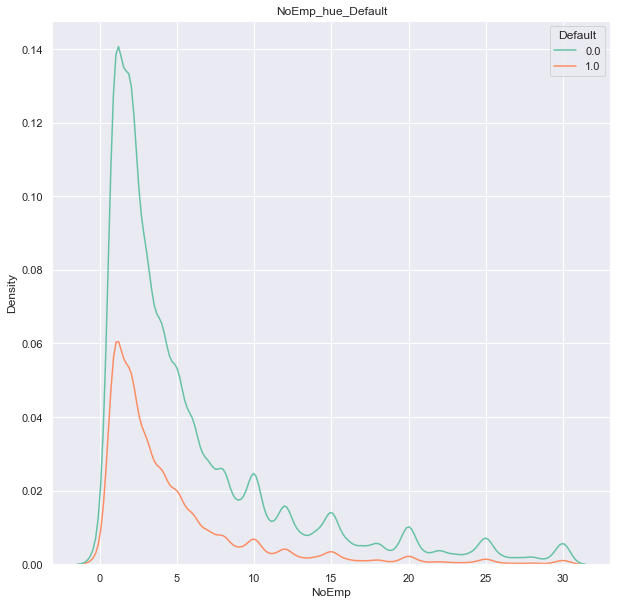

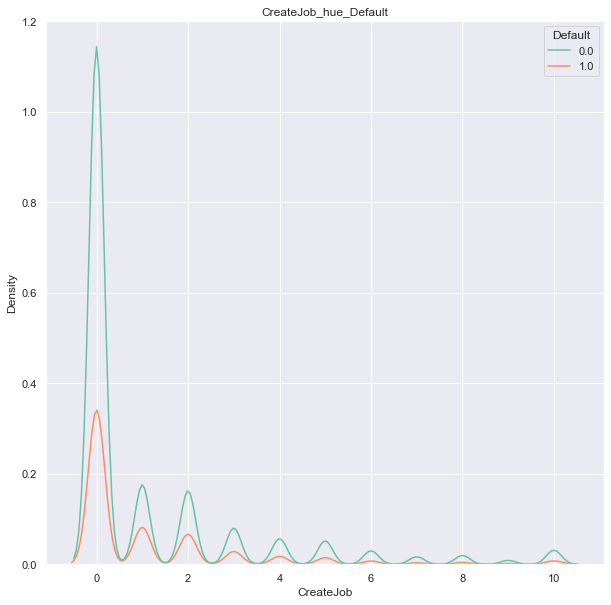

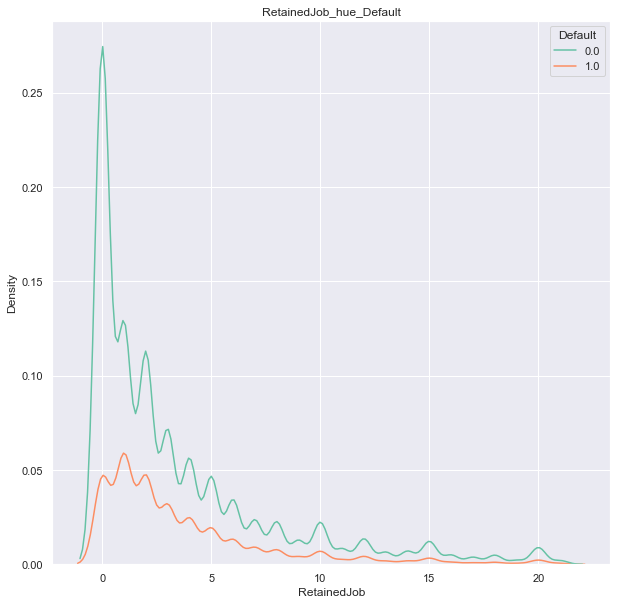

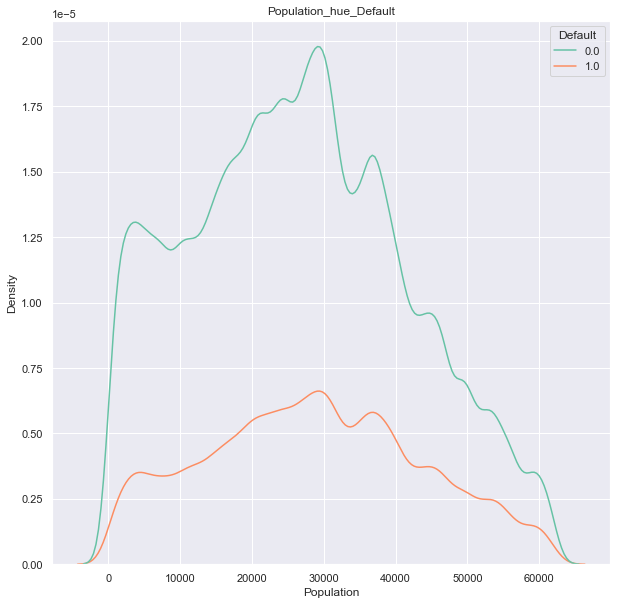

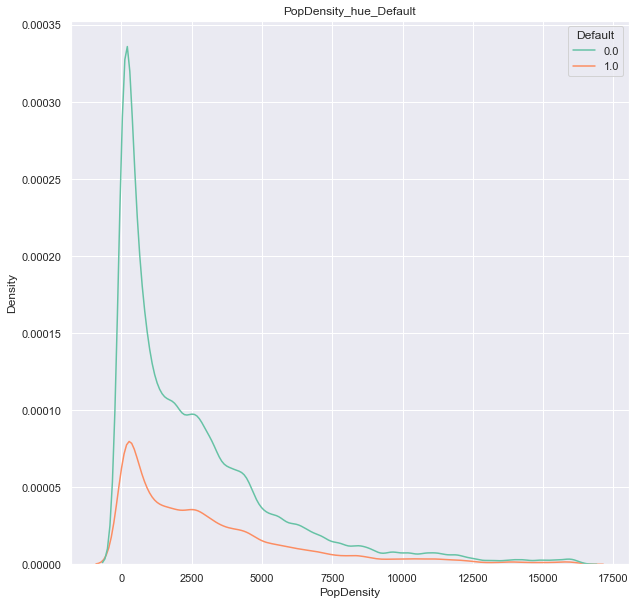

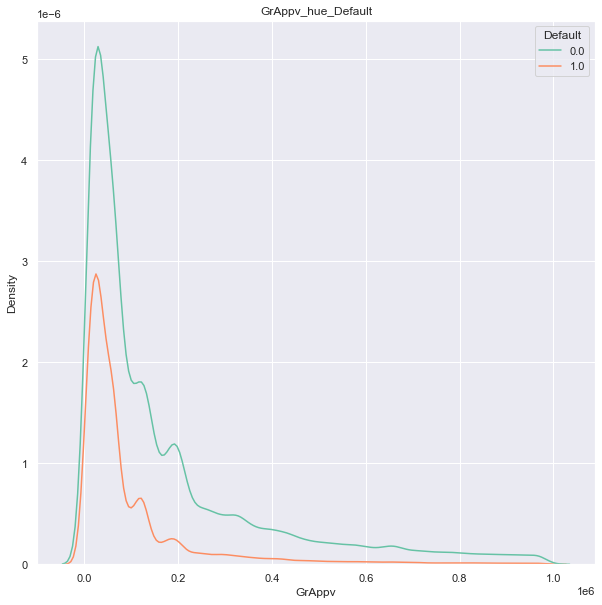

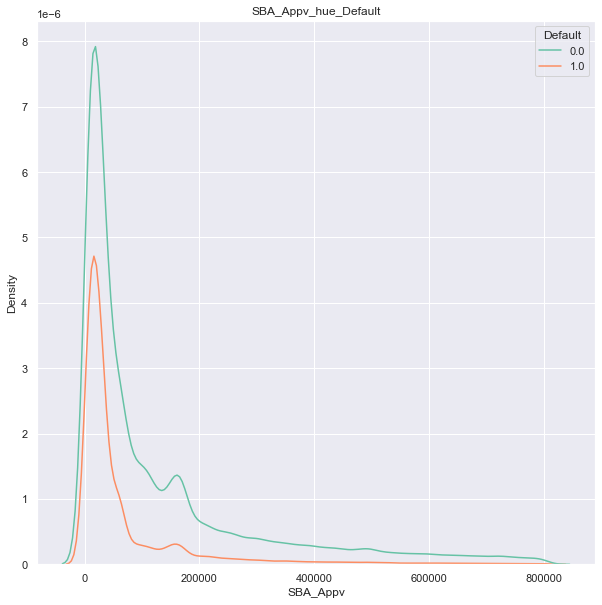

D:\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


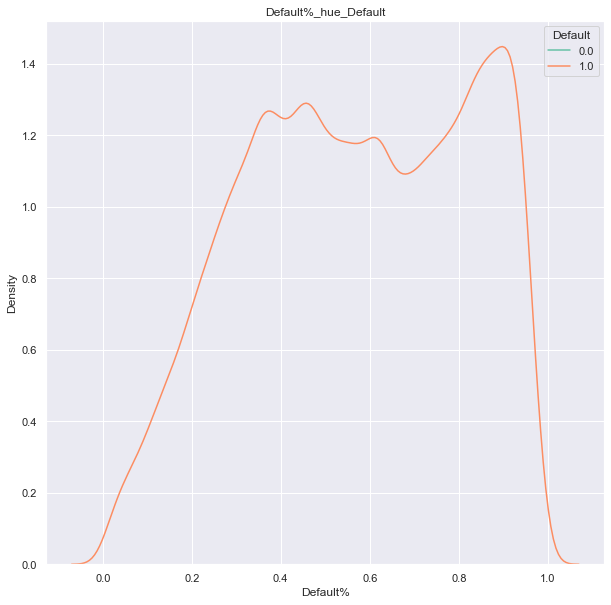

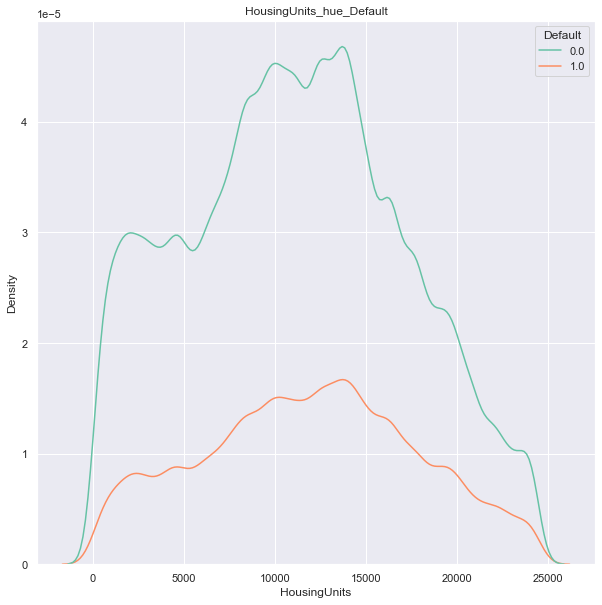

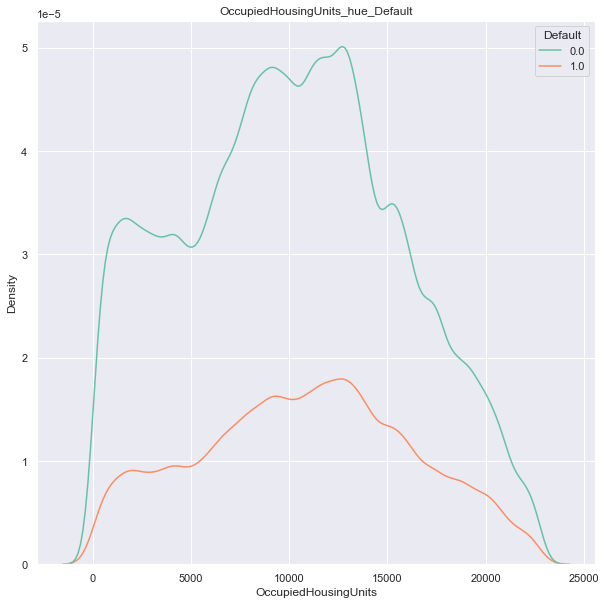

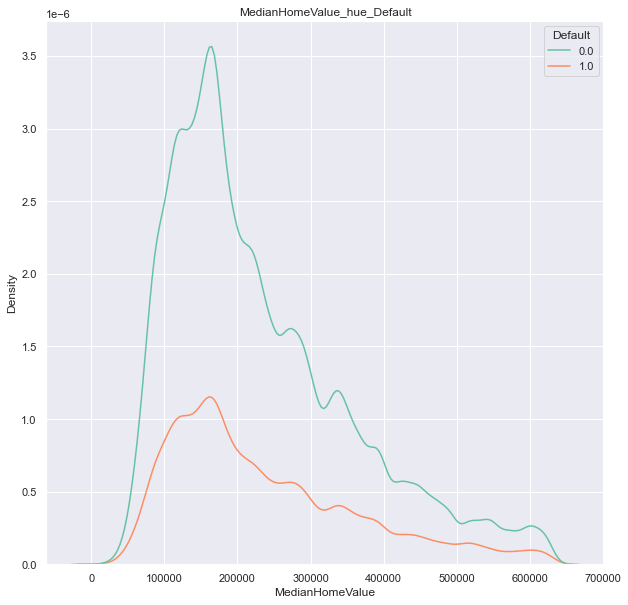

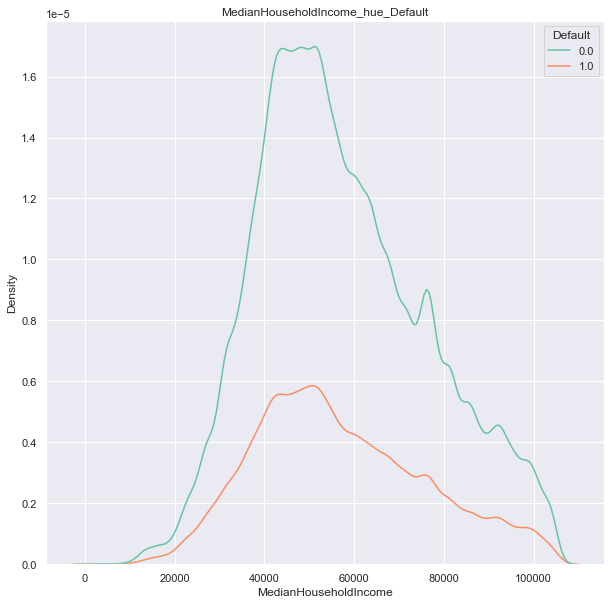

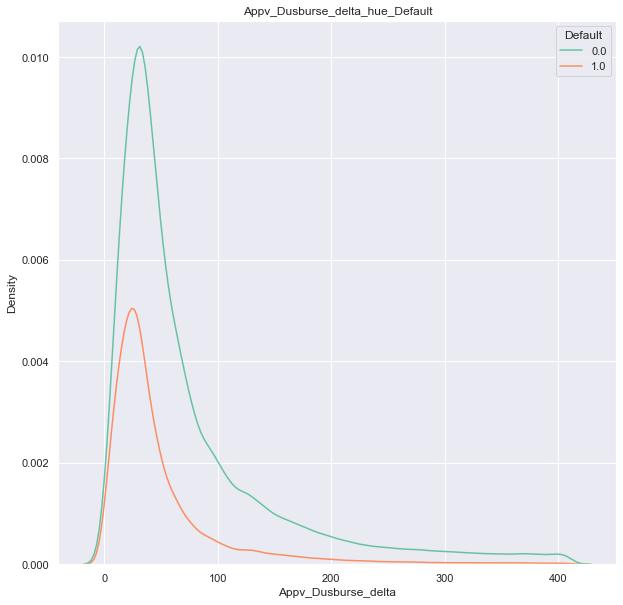

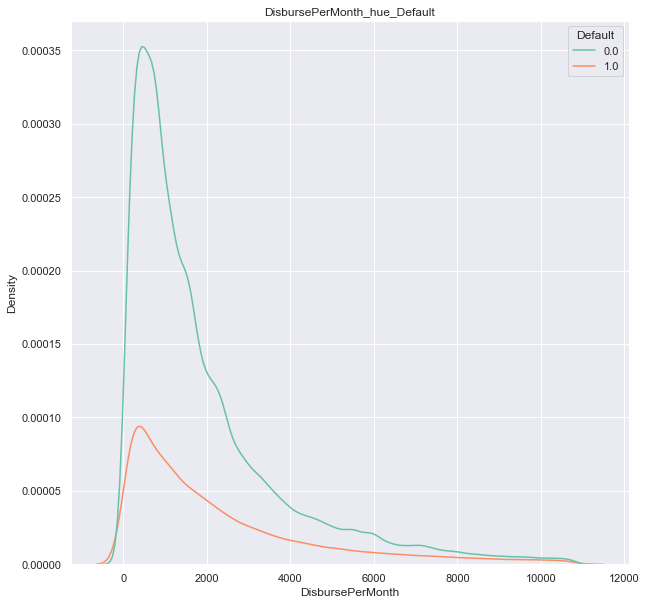

In [9]:
num_visualization_with_hue(df_copy, num_features, hue_col='Default', exclude_outlier=2.5)

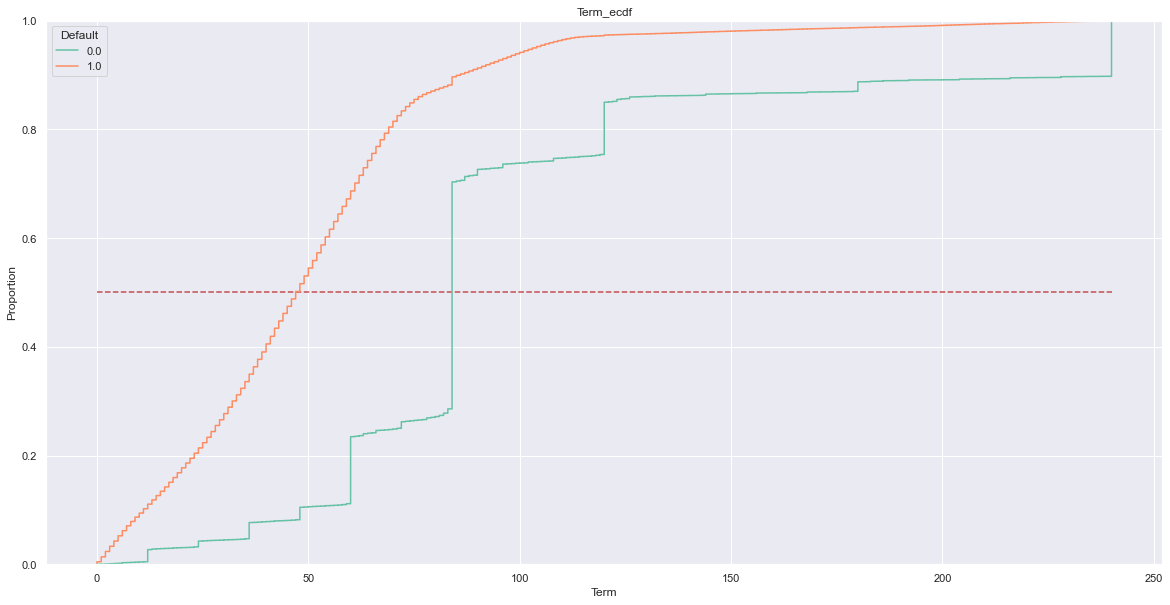

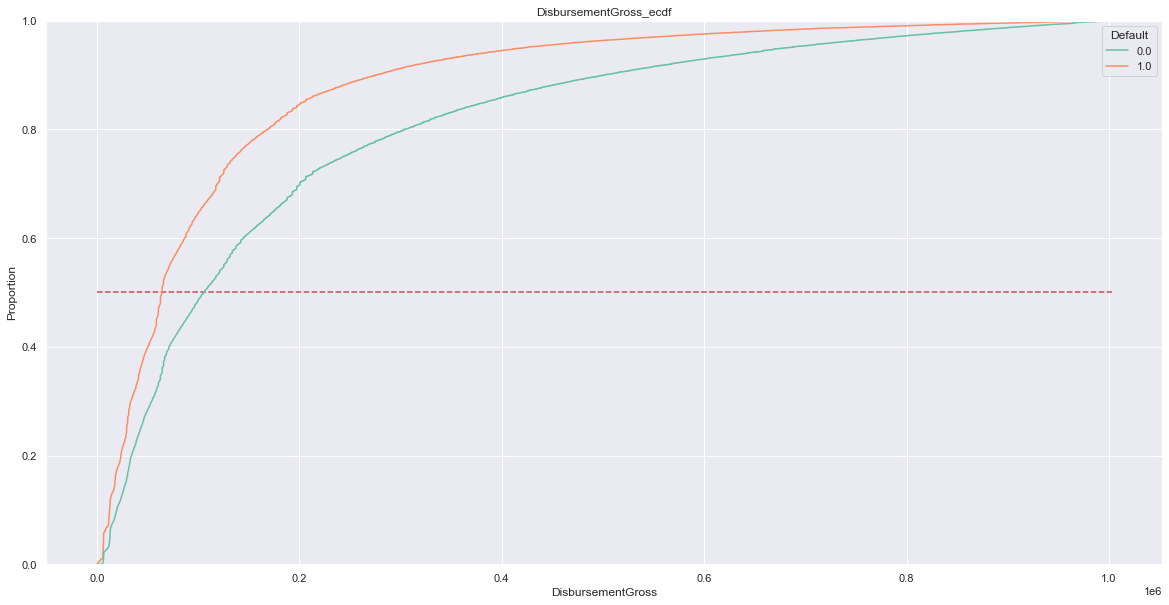

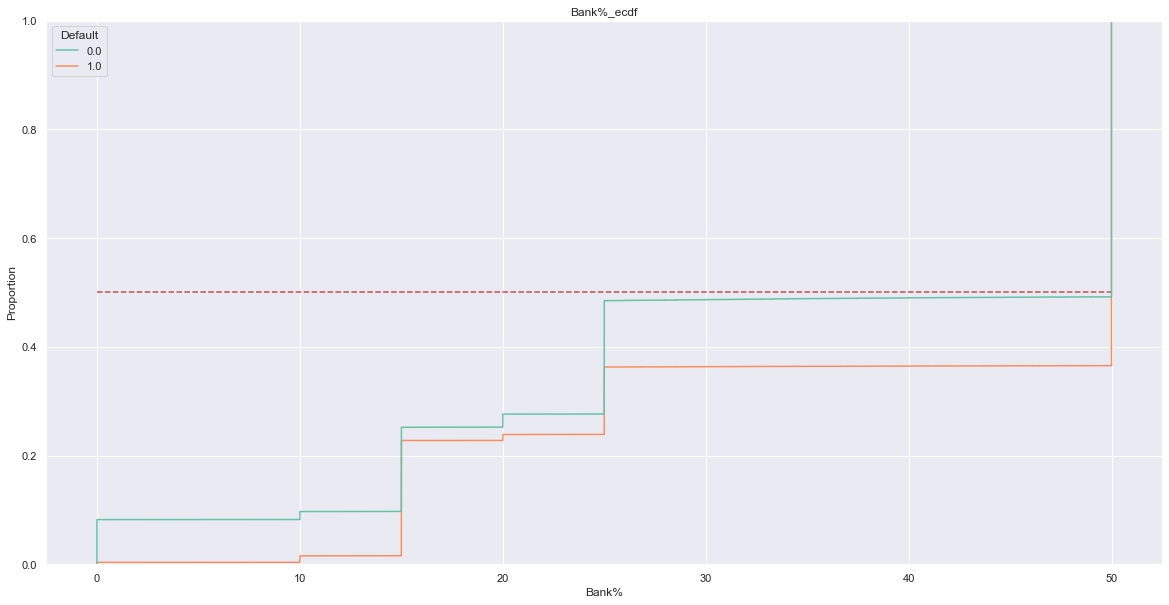

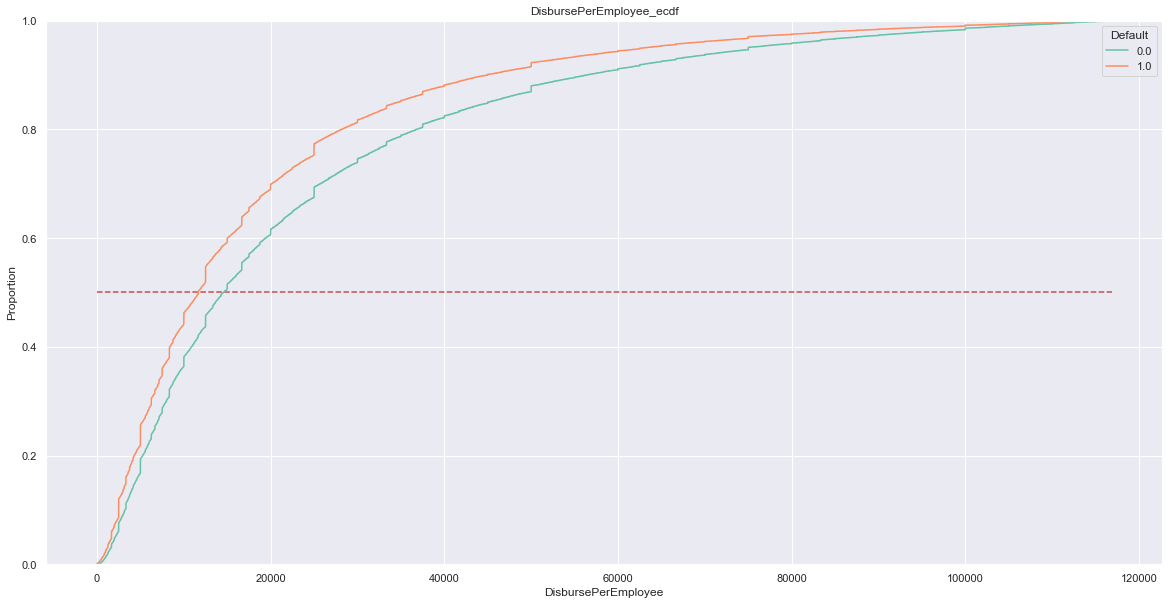

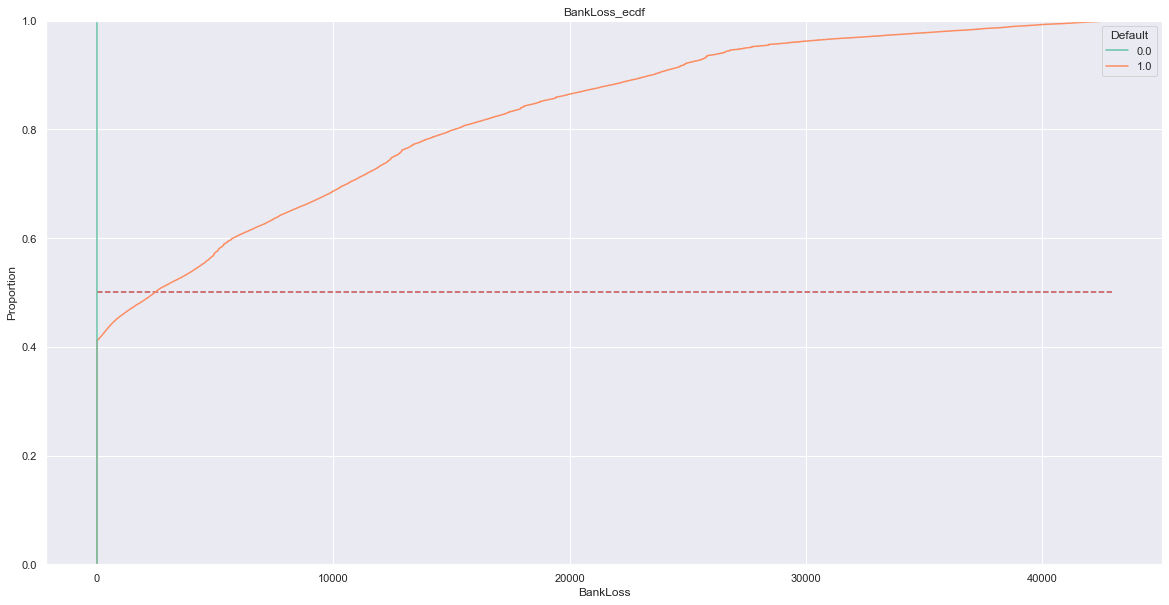

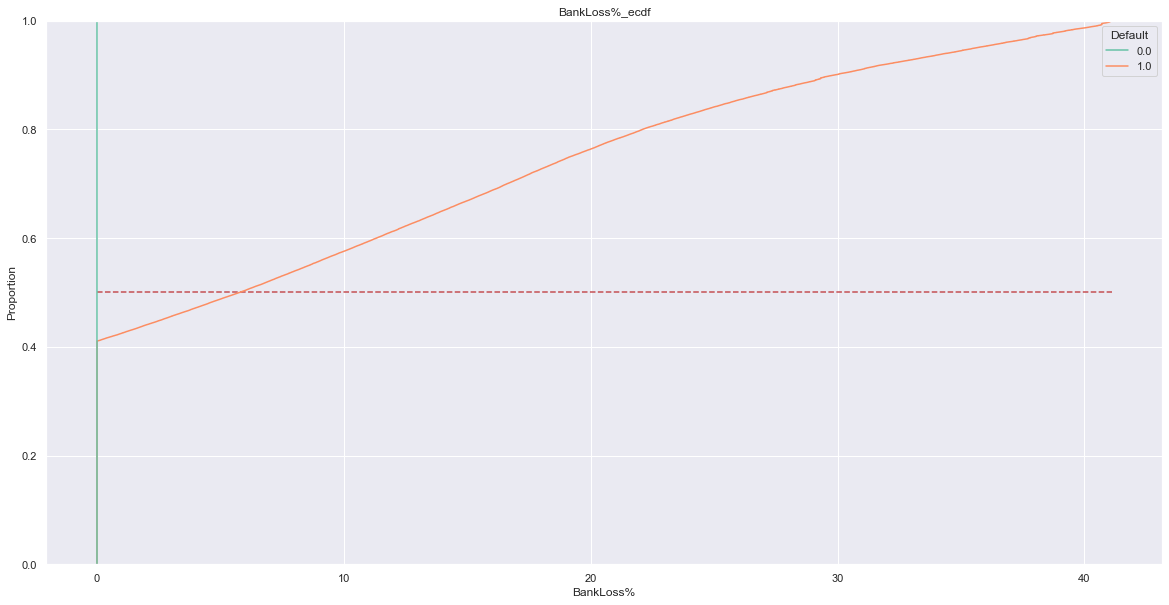

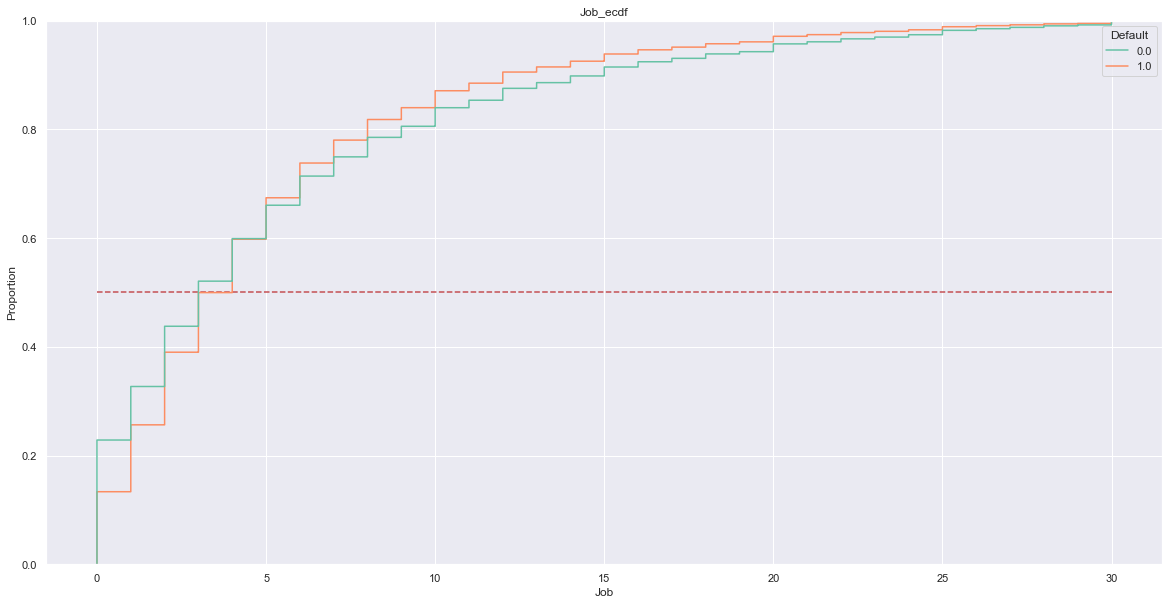

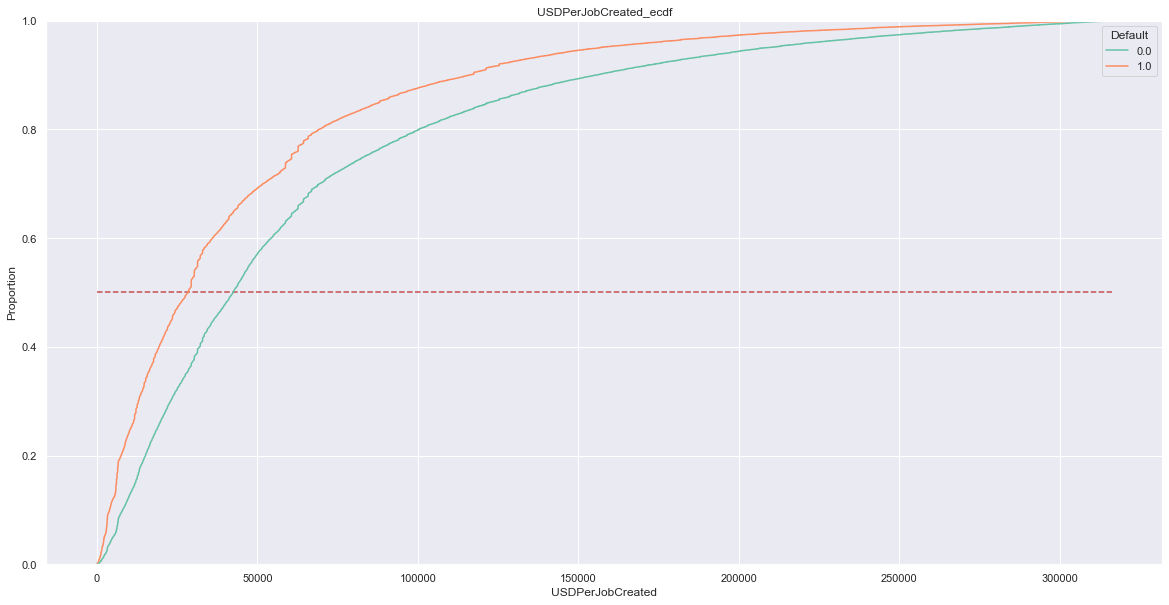

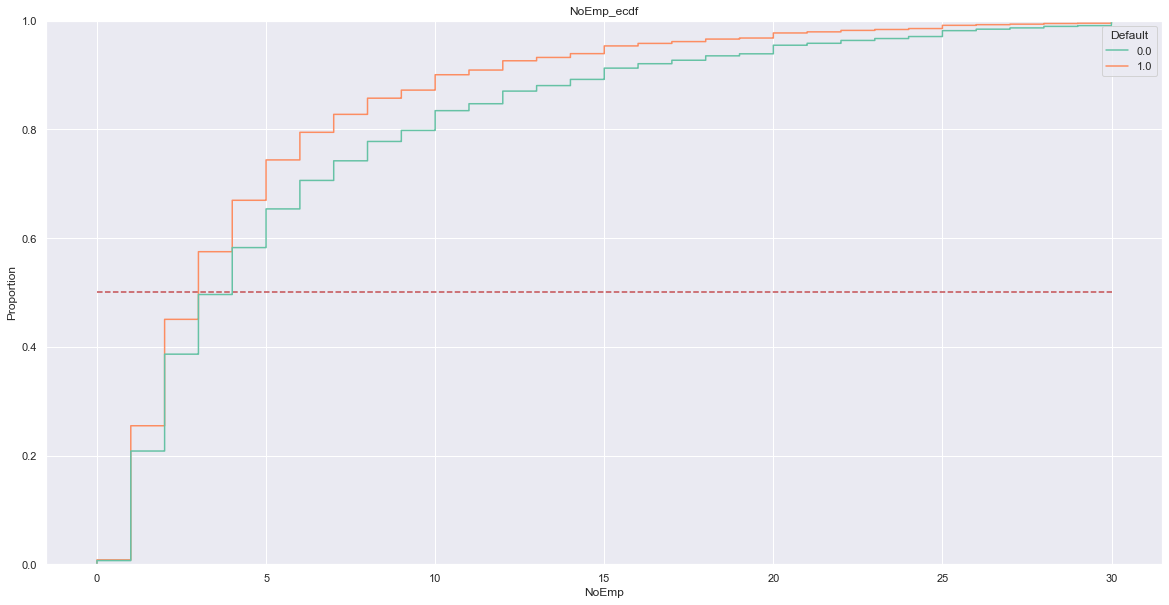

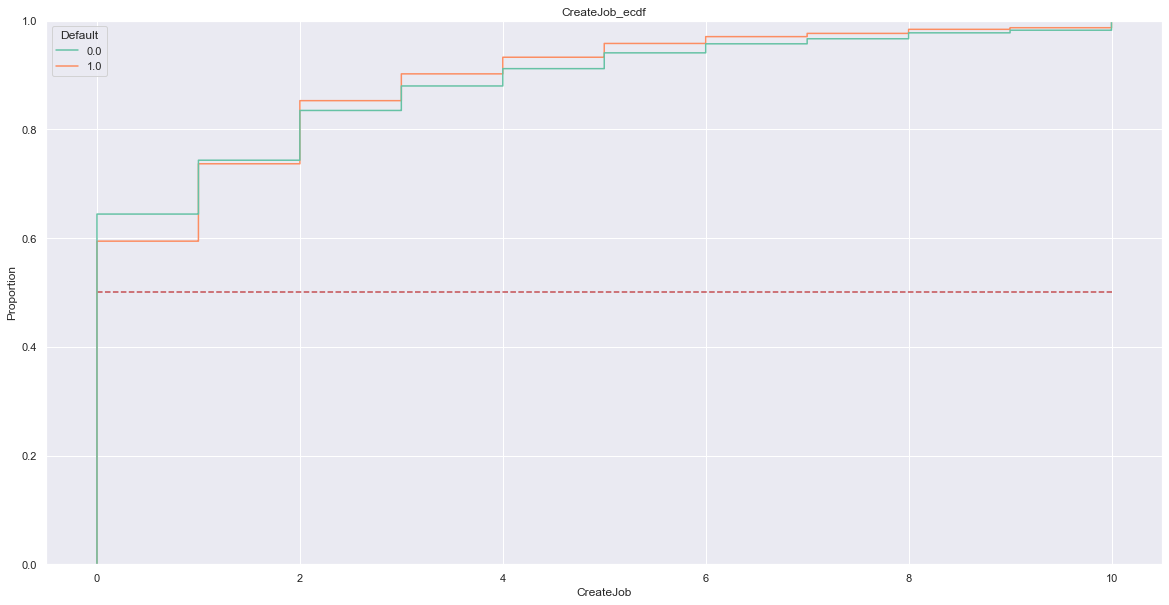

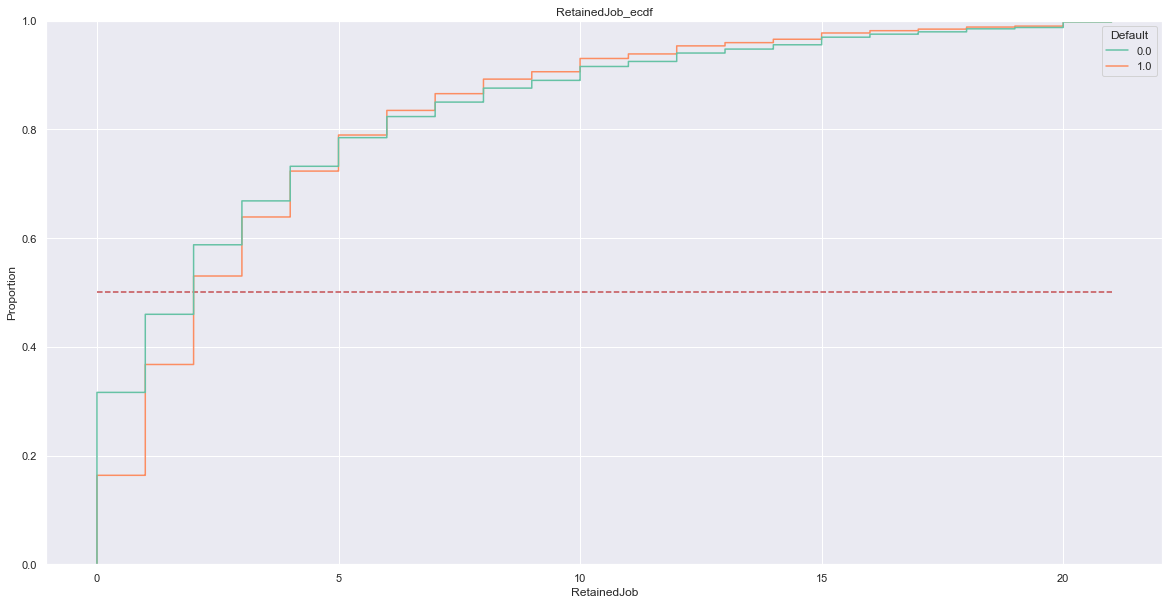

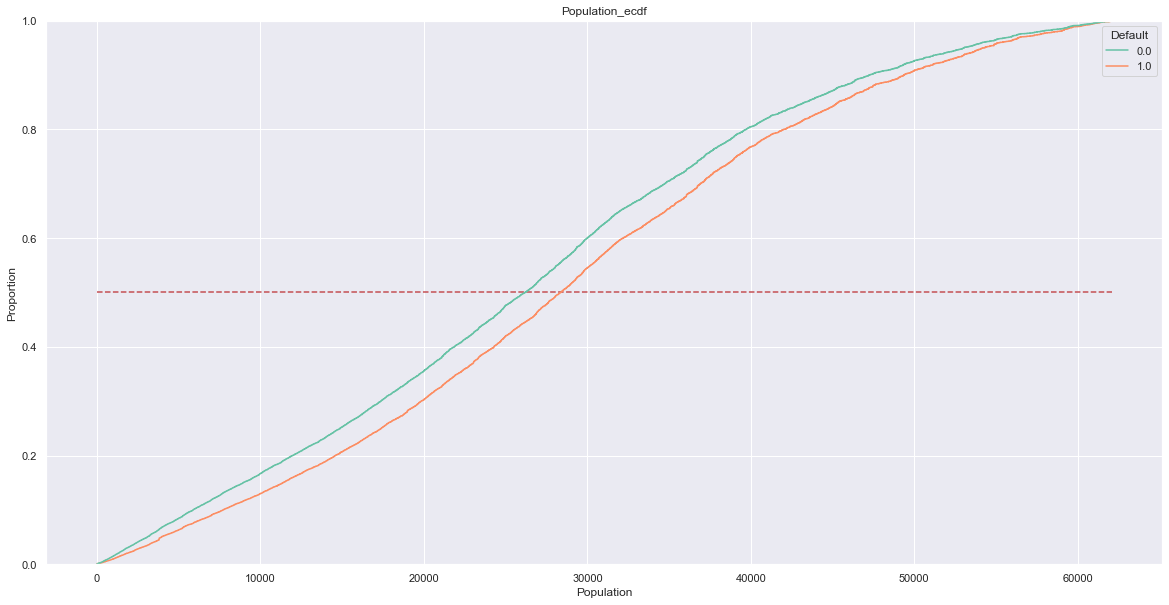

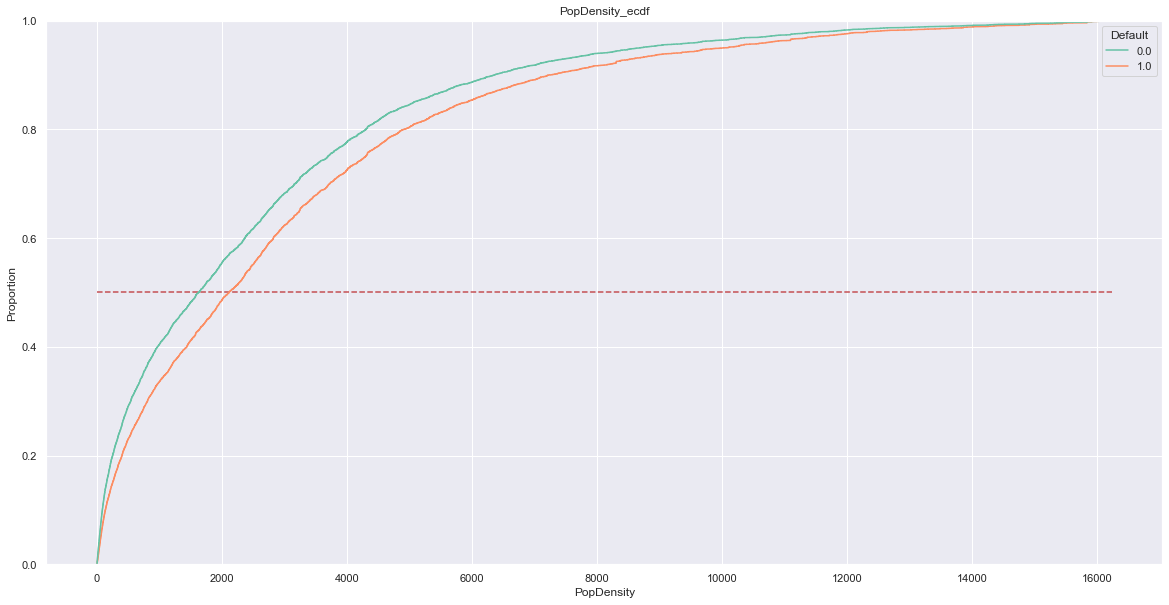

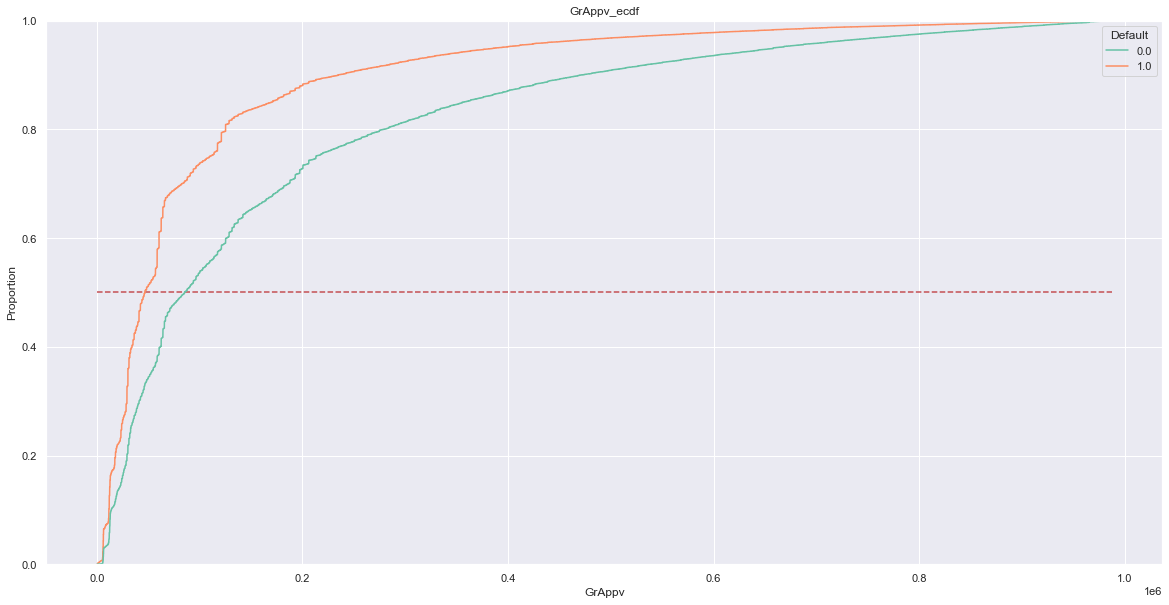

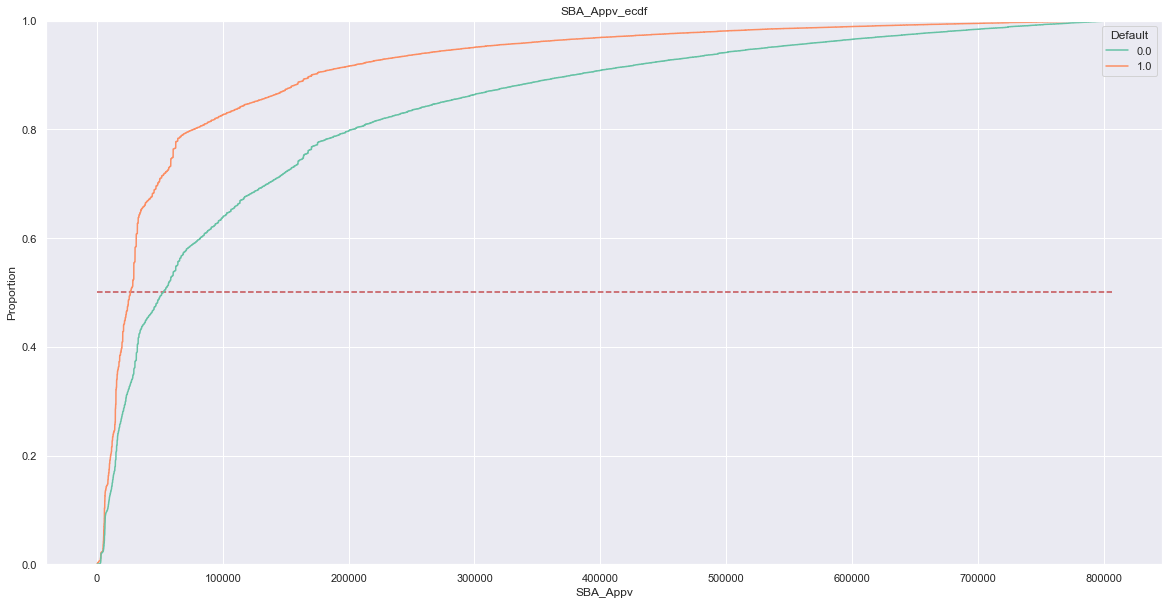

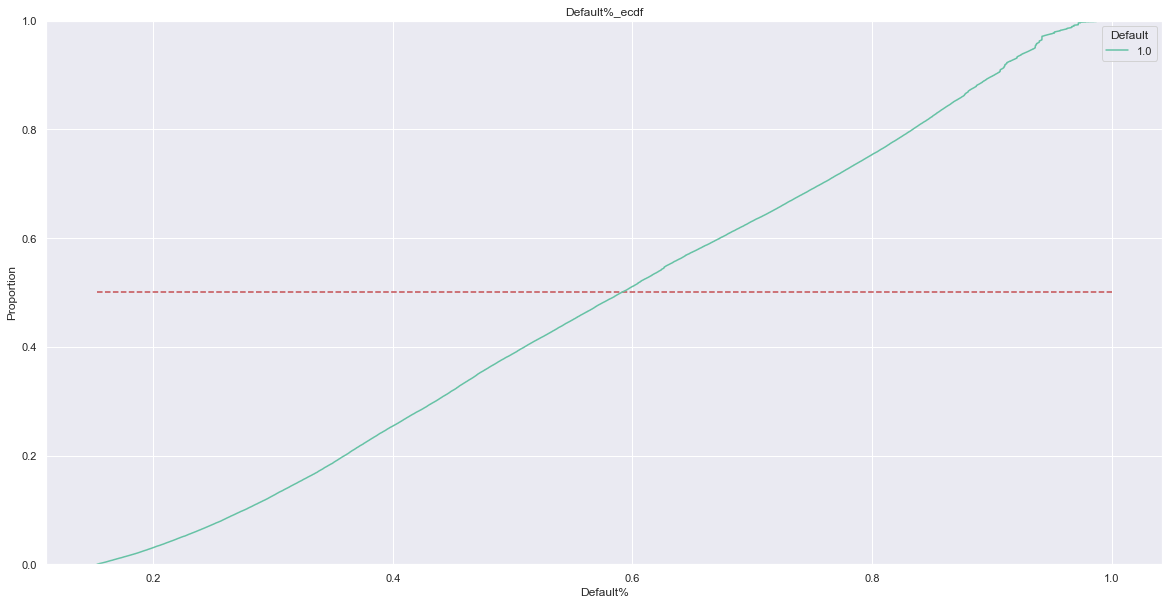

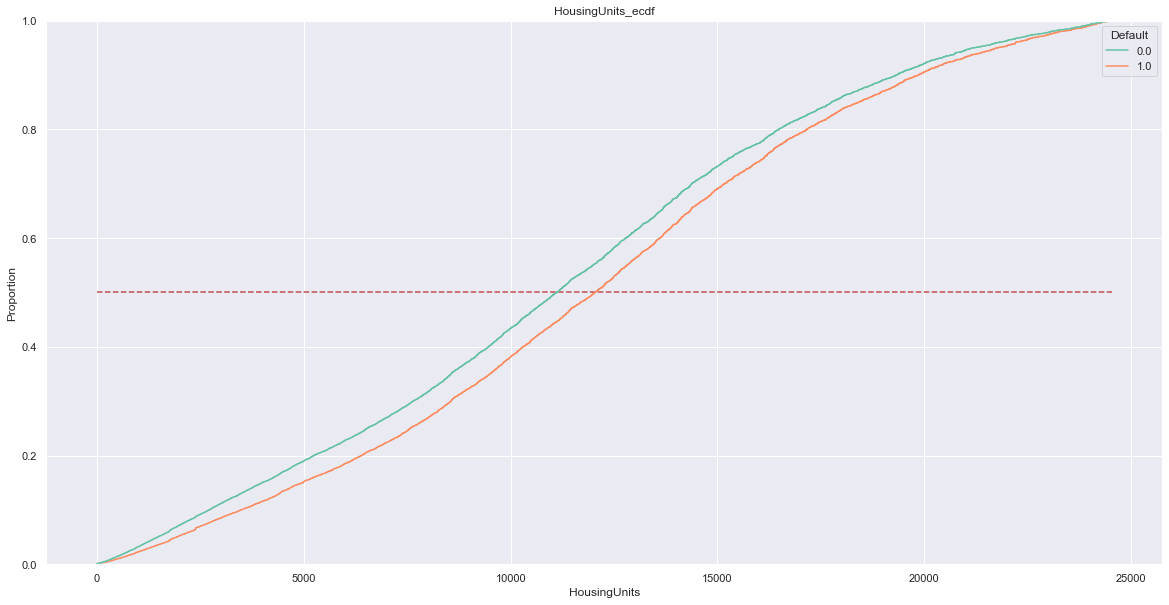

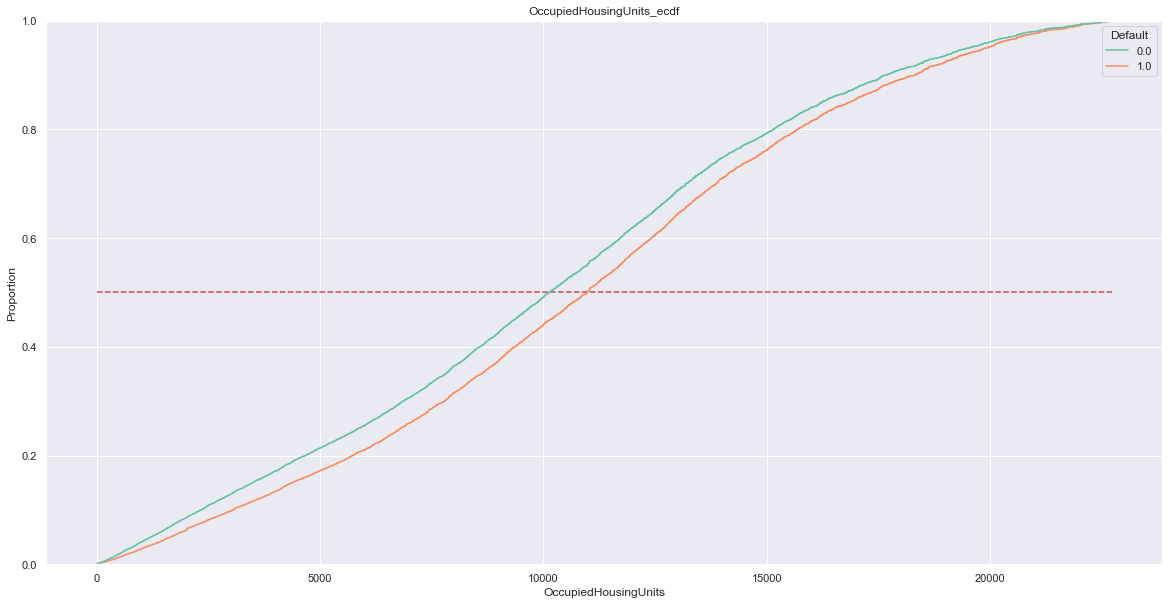

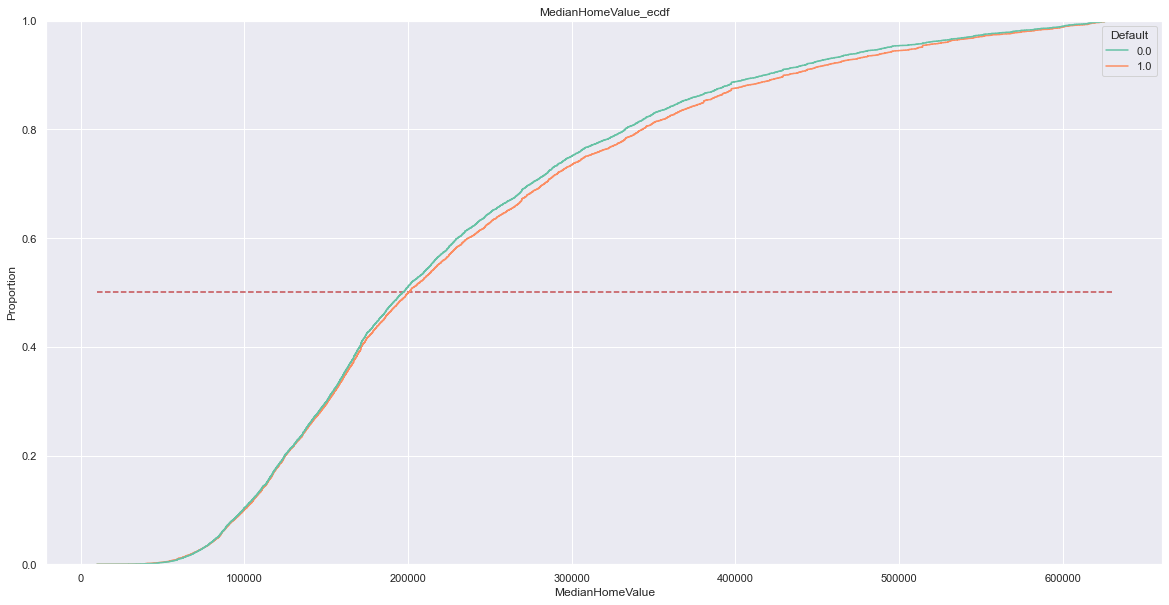

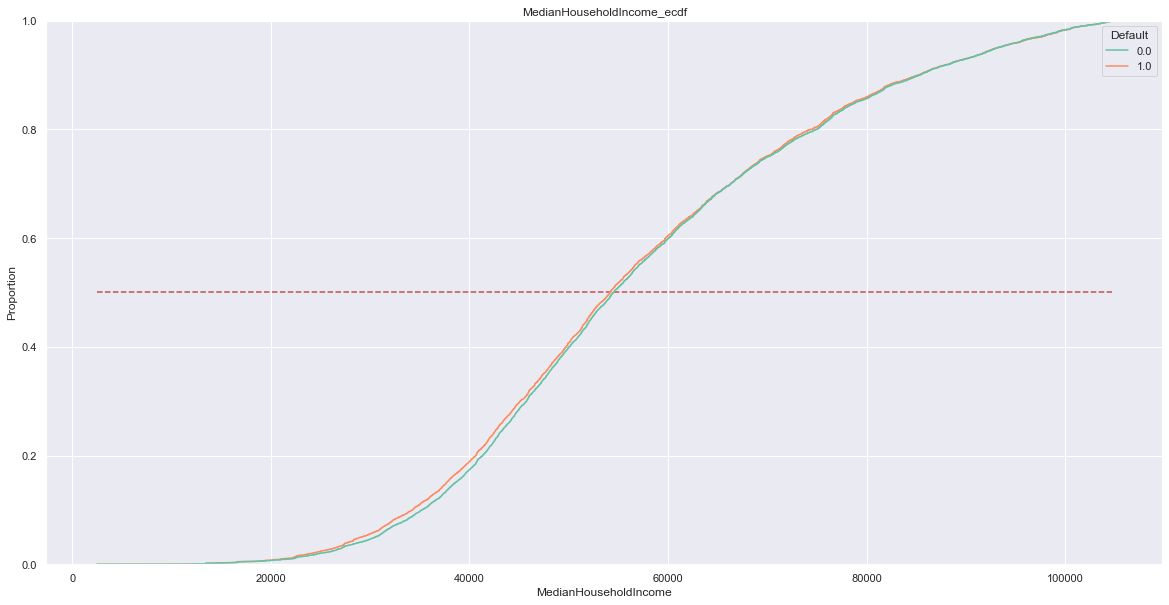

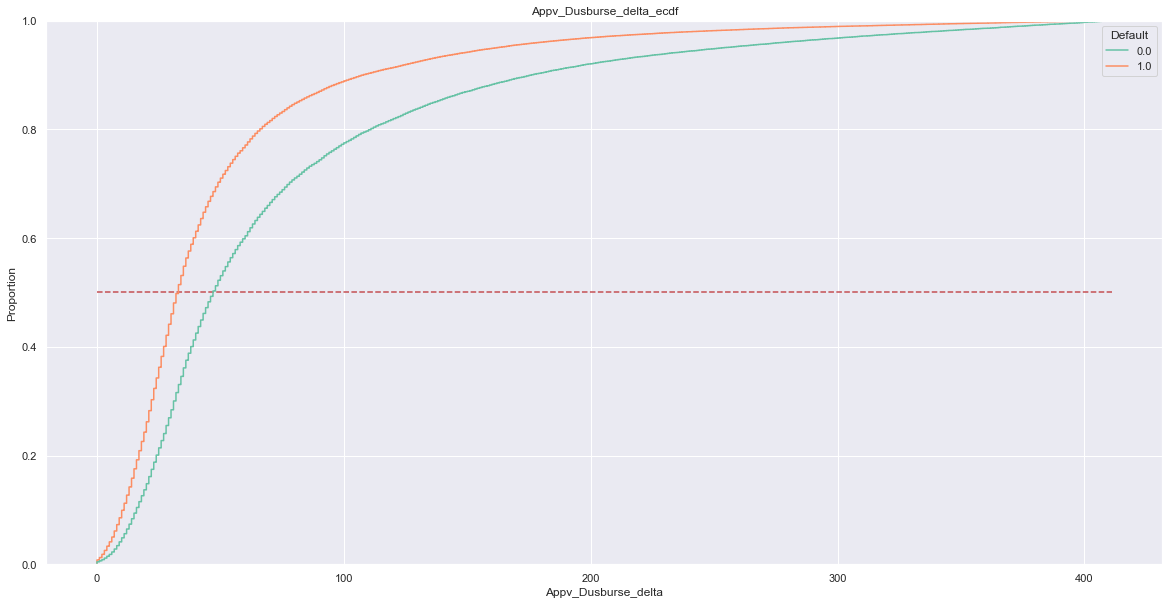

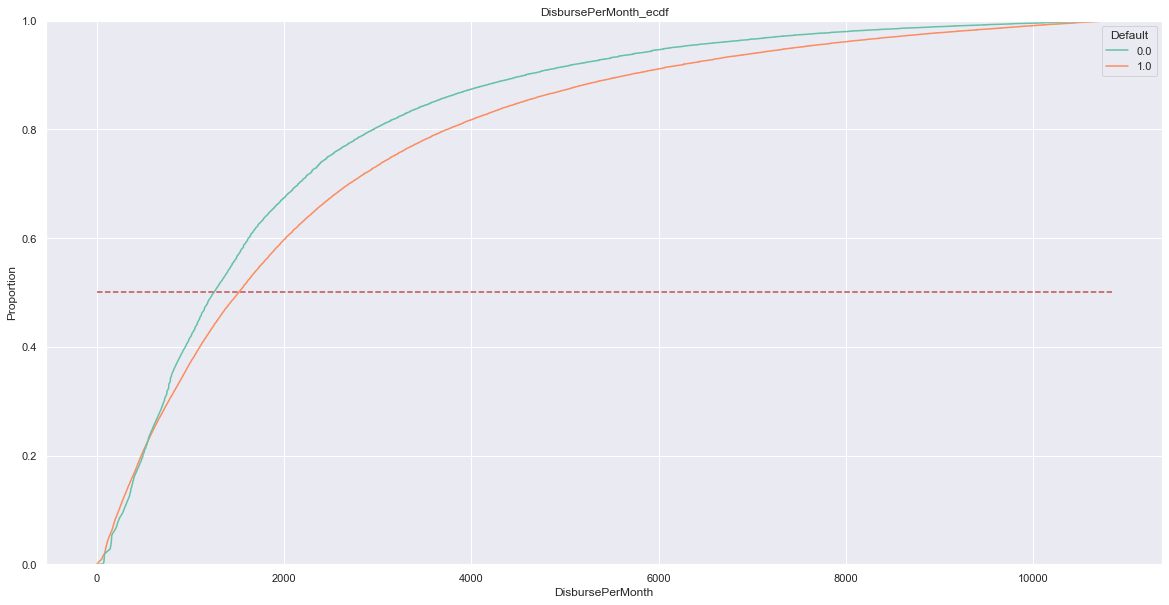

In [10]:
df_vis = df_copy.copy()
hue_col = 'Default'

for i in range(len(num_features)):
    if num_features[i] in [hue_col, 'ChgOffPrinGr']:
        continue

    num_col = num_features[i]
    vis = df_vis[[num_col, hue_col]]
    vis = vis[~(pd.isnull(vis[num_features[i]]))]

    upb = np.percentile(vis, 97.5)
    lwb = np.percentile(vis, 2.5)
    vis = vis[(vis[num_col] >= lwb) & (vis[num_col] <= upb)]

    plt.figure(figsize=(20, 10))
    sns.set_theme(style="darkgrid")
    title = num_col + '_ecdf'
    plt.title(title)
    plt.hlines(y=0.5, xmin=vis[num_col].min(), xmax=vis[num_col].max(), colors='r', linestyles='dashed')
    sns.set_palette(sns.color_palette("Set2"))
    sns.ecdfplot(data=vis, x=num_col, hue='Default')
    plt.savefig(title + '.jpeg')
    plt.show()
    df_vis = df_copy.copy()

In [11]:
# df_vis = df_copy.copy()
# hue_col = 'Default'
# db = ['DisbursementGross']

# for i in range(len(db)):
#     if db[i] in [hue_col, 'ChgOffPrinGr']:
#         continue

#     num_col = db[i]
#     vis = df_vis[[num_col, hue_col]]
#     vis = vis[~(pd.isnull(vis[db[i]]))]
    
#     upb = np.percentile(vis, 95)
#     lwb = np.percentile(vis, 5)
#     vis = vis[(vis[num_col] >= lwb) & (vis[num_col] <= upb)]
    
#     plt.figure(figsize=(20, 10))
#     sns.set_theme(style="darkgrid")
#     title = num_col + '_ecdf'
#     plt.title(title)
#     plt.hlines(y=0.5, xmin=vis[num_col].min(), xmax=vis[num_col].max(), colors='r', linestyles='dashed')
#     sns.ecdfplot(data=vis, x=num_col, hue='Default', palette=sns.color_palette("Set2")[:2])
#     plt.savefig(title + '.jpeg')
#     plt.show()
#     df_vis = df_copy.copy()

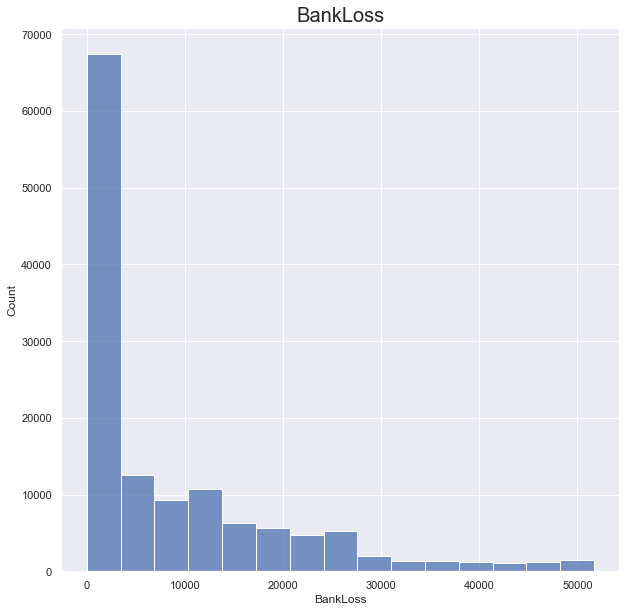

In [12]:
num_visualization(df_copy, num_features=['BankLoss'], exclude_outlier=2.5)

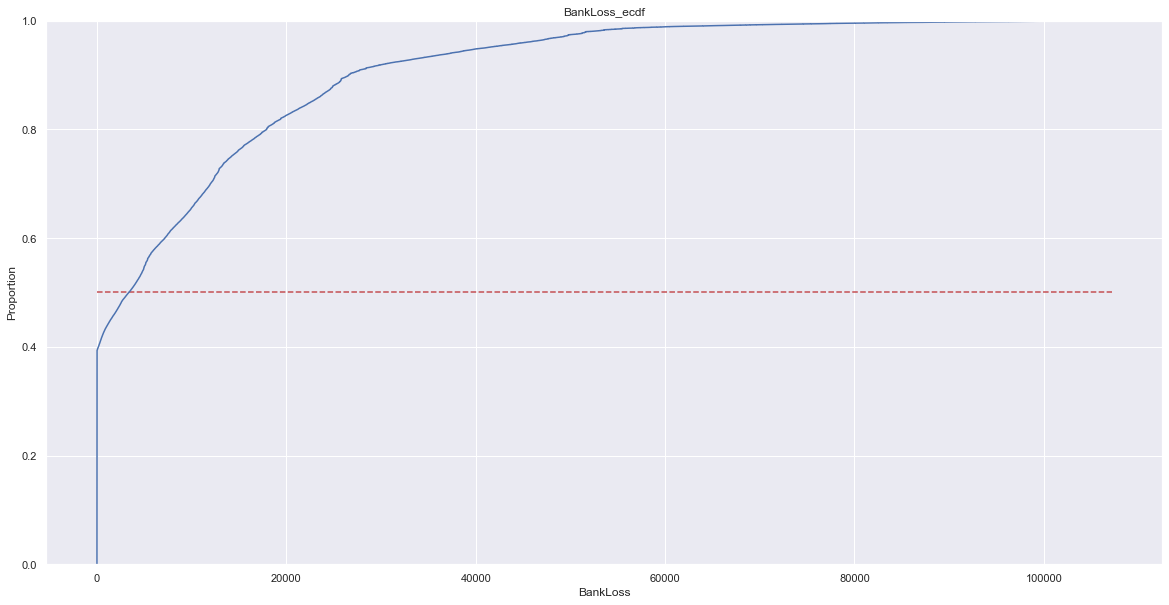

In [13]:
num_col = 'BankLoss'
df_vis = df_copy.copy()
df_vis = df_vis[~(pd.isnull(df_vis[num_col]))]

upb = np.percentile(df_vis[num_col], 99.5)
df_vis = df_vis[(df_vis[num_col] <= upb)]

plt.figure(figsize=(20, 10))
sns.set_theme(style="darkgrid")
title = num_col + '_ecdf'
plt.title(title)
plt.hlines(y=0.5, xmin=df_vis[num_col].min(), xmax=df_vis[num_col].max(), colors='r', linestyles='dashed')
sns.ecdfplot(data=df_vis, x=num_col, palette=sns.color_palette("Set2")[:2])
plt.savefig(title + '.jpeg')
plt.show()

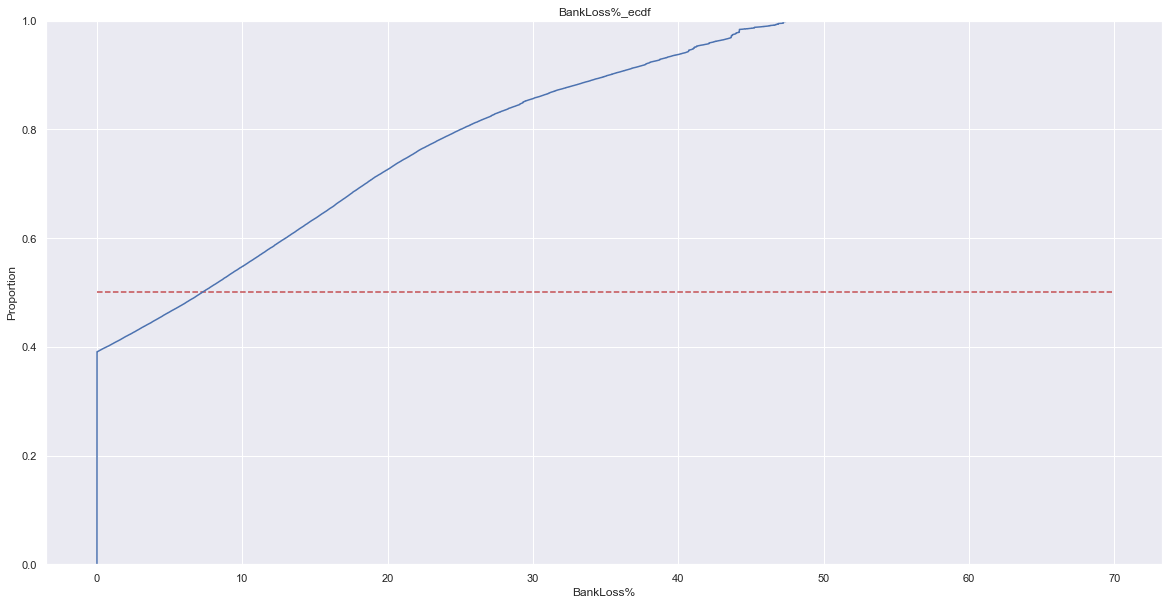

In [14]:
num_col = 'BankLoss%'
df_vis = df_copy.copy()
df_vis = df_vis[~(pd.isnull(df_vis[num_col]))]

# upb = np.percentile(df_vis[num_col], 99)
# df_vis = df_vis[(df_vis[num_col] <= upb)]

plt.figure(figsize=(20, 10))
sns.set_theme(style="darkgrid")
title = num_col + '_ecdf'
plt.title(title)
plt.hlines(y=0.5, xmin=df_vis[num_col].min(), xmax=df_vis[num_col].max(), colors='r', linestyles='dashed')
sns.ecdfplot(data=df_vis, x=num_col, palette=sns.color_palette("Set2")[:2])
plt.savefig(title + '.jpeg')
plt.show()

In [15]:
df_copy['BankLoss'].describe()

count    135109.000
mean      10493.938
std       19249.789
min           0.000
25%           0.000
50%        3484.054
75%       14437.295
max     1213184.643
Name: BankLoss, dtype: float64

In [16]:
df_copy['BankLoss%'].describe()

count   135109.000
mean        12.232
std         13.942
min          0.000
25%          0.000
50%          7.223
75%         21.458
max         69.798
Name: BankLoss%, dtype: float64

In [17]:
df_copy['Default'].describe()

count   530453.000
mean         0.257
std          0.437
min          0.000
25%          0.000
50%          0.000
75%          1.000
max          1.000
Name: Default, dtype: float64

In [18]:
df_copy['Default'].value_counts()

0.000    394129
1.000    136324
Name: Default, dtype: int64

In [19]:
df_copy['ChgOffPrinGr'].sum() / 10

1029063996.9125255

In [20]:
df_copy['ChgOffPrinGr'].sum() / df_copy['DisbursementGross'].sum()

0.08201160749979357

In [21]:
# obj_visualization(df_copy, obj_features=['State', 'BankState'])

In [22]:
print(df_copy['Is_Cross_State'].mean())
df_copy['Is_Cross_State'].value_counts()

0.5692926611782759


1    301983
0    228470
Name: Is_Cross_State, dtype: int64

In [23]:
df_nc_cross = df_copy[(df_copy['Is_Cross_State'] == 1) & (df_copy['BankState'] == 'NC')]
df_nc_cross['Bank'].value_counts()[:10]

BANK OF AMERICA NATL ASSOC        56246
BRANCH BK. & TR CO                 2175
FIRST-CITIZENS BK & TR CO          1083
WELLS FARGO BANK NATL ASSOC         412
SURREY BANK & TRUST                  50
LIVE OAK BANKING COMPANY             46
PNC BANK, NATIONAL ASSOCIATION        7
COMMUNITYONE BANK NATL ASSOC          5
UWHARRIE BANK                         3
CARTER BANK & TRUST                   3
Name: Bank, dtype: int64

In [24]:
bank_list = ['CAPITAL ONE NATL ASSOC', 'HSBC BK USA NATL ASSOC', 'BRANCH BK. & TR CO', 'FIRST-CITIZENS BK & TR CO', 
             'BANK OF AMERICA NATL ASSOC', 'WELLS FARGO BANK NATL ASSOC', 'CITIBANK, N.A.']

In [25]:
for bk in bank_list:
    print(('=' * 6) + bk + ('=' * 6))
    print('======ALL======')
    df_cpt1 = df_copy[(df_copy['Bank'] == bk)]
    display(df_cpt1['Default'].value_counts())
    print('row:', len(df_cpt1))
    print('Default rate: {:.2f}%'.format(df_cpt1['Default'].mean() * 100))
    print('======Cross State======')
    df_cpt1 = df_copy[(df_copy['Is_Cross_State'] == 1) & (df_copy['Bank'] == bk)]
    display(df_cpt1['Default'].value_counts())
    print('row:', len(df_cpt1))
    print('Default rate: {:.2f}%'.format(df_cpt1['Default'].mean() * 100))

======CAPITAL ONE NATL ASSOC======
======ALL======


0.000    12023
1.000     9390
Name: Default, dtype: int64

row: 21413
Default rate: 43.85%
======Cross State======


0.000    11652
1.000     9141
Name: Default, dtype: int64

row: 20793
Default rate: 43.96%
======HSBC BK USA NATL ASSOC======
======ALL======


0.000    1689
1.000    1653
Name: Default, dtype: int64

row: 3342
Default rate: 49.46%
======Cross State======


1.000    1240
0.000     220
Name: Default, dtype: int64

row: 1460
Default rate: 84.93%
======BRANCH BK. & TR CO======
======ALL======


0.000    2694
1.000     524
Name: Default, dtype: int64

row: 3218
Default rate: 16.28%
======Cross State======


0.000    1816
1.000     404
Name: Default, dtype: int64

row: 2220
Default rate: 18.20%
======FIRST-CITIZENS BK & TR CO======
======ALL======


0.000    1416
1.000     232
Name: Default, dtype: int64

row: 1648
Default rate: 14.08%
======Cross State======


0.000    1027
1.000     166
Name: Default, dtype: int64

row: 1193
Default rate: 13.91%
======BANK OF AMERICA NATL ASSOC======
======ALL======


0.000    44645
1.000    23248
Name: Default, dtype: int64

row: 67893
Default rate: 34.24%
======Cross State======


0.000    42677
1.000    22628
Name: Default, dtype: int64

row: 65305
Default rate: 34.65%
======WELLS FARGO BANK NATL ASSOC======
======ALL======


0.000    19737
1.000     6477
Name: Default, dtype: int64

row: 26214
Default rate: 24.71%
======Cross State======


0.000    15418
1.000     6250
Name: Default, dtype: int64

row: 21668
Default rate: 28.84%
======CITIBANK, N.A.======
======ALL======


0.000    3857
1.000    1350
Name: Default, dtype: int64

row: 5207
Default rate: 25.93%
======Cross State======


0.000    2079
1.000    1153
Name: Default, dtype: int64

row: 3232
Default rate: 35.67%


In [26]:
df_copy['Bank'].value_counts()[:5]

BANK OF AMERICA NATL ASSOC        67893
JPMORGAN CHASE BANK NATL ASSOC    32342
CITIZENS BANK NATL ASSOC          31629
WELLS FARGO BANK NATL ASSOC       26214
BBCN BANK                         21681
Name: Bank, dtype: int64

In [27]:
for bk in list(df_copy['Bank'].value_counts()[:10].index):
    print('')
    print(('=' * 6) + bk + ('=' * 6))
    print('')
    print('======ALL======')
    df_cpt1 = df_copy[(df_copy['Bank'] == bk)]
    display(df_cpt1['Default'].value_counts())
    print('row:', len(df_cpt1))
    print('Default rate: {:.2f}%'.format(df_cpt1['Default'].mean() * 100))
    print('')
    print('======Cross State======')
    print('')
    df_cpt1 = df_copy[(df_copy['Is_Cross_State'] == 1) & (df_copy['Bank'] == bk)]
    display(df_cpt1['Default'].value_counts())
    print('row:', len(df_cpt1))
    print('Default rate: {:.2f}%'.format(df_cpt1['Default'].mean() * 100))


======BANK OF AMERICA NATL ASSOC======

======ALL======


0.000    44645
1.000    23248
Name: Default, dtype: int64

row: 67893
Default rate: 34.24%

======Cross State======



0.000    42677
1.000    22628
Name: Default, dtype: int64

row: 65305
Default rate: 34.65%

======JPMORGAN CHASE BANK NATL ASSOC======

======ALL======


0.000    20493
1.000    11849
Name: Default, dtype: int64

row: 32342
Default rate: 36.64%

======Cross State======



0.000    18428
1.000    10678
Name: Default, dtype: int64

row: 29106
Default rate: 36.69%

======CITIZENS BANK NATL ASSOC======

======ALL======


0.000    23073
1.000     8556
Name: Default, dtype: int64

row: 31629
Default rate: 27.05%

======Cross State======



0.000    17701
1.000     7811
Name: Default, dtype: int64

row: 25512
Default rate: 30.62%

======WELLS FARGO BANK NATL ASSOC======

======ALL======


0.000    19737
1.000     6477
Name: Default, dtype: int64

row: 26214
Default rate: 24.71%

======Cross State======



0.000    15418
1.000     6250
Name: Default, dtype: int64

row: 21668
Default rate: 28.84%

======BBCN BANK======

======ALL======


1.000    13598
0.000     8083
Name: Default, dtype: int64

row: 21681
Default rate: 62.72%

======Cross State======



1.000    10091
0.000     5231
Name: Default, dtype: int64

row: 15322
Default rate: 65.86%

======CAPITAL ONE NATL ASSOC======

======ALL======


0.000    12023
1.000     9390
Name: Default, dtype: int64

row: 21413
Default rate: 43.85%

======Cross State======



0.000    11652
1.000     9141
Name: Default, dtype: int64

row: 20793
Default rate: 43.96%

======U.S. BANK NATIONAL ASSOCIATION======

======ALL======


0.000    14456
1.000     5273
Name: Default, dtype: int64

row: 19729
Default rate: 26.73%

======Cross State======



0.000    12930
1.000     4815
Name: Default, dtype: int64

row: 17745
Default rate: 27.13%

======PNC BANK, NATIONAL ASSOCIATION======

======ALL======


0.000    14240
1.000     4713
Name: Default, dtype: int64

row: 18953
Default rate: 24.87%

======Cross State======



0.000    10616
1.000     4584
Name: Default, dtype: int64

row: 15200
Default rate: 30.16%

======READYCAP LENDING, LLC======

======ALL======


0.000    4695
1.000    2238
Name: Default, dtype: int64

row: 6933
Default rate: 32.28%

======Cross State======



0.000    4125
1.000    1953
Name: Default, dtype: int64

row: 6078
Default rate: 32.13%

======MANUFACTURERS & TRADERS TR CO======

======ALL======


0.000    5310
1.000    1144
Name: Default, dtype: int64

row: 6454
Default rate: 17.73%

======Cross State======



0.000    2226
1.000     551
Name: Default, dtype: int64

row: 2777
Default rate: 19.84%


In [28]:
# df_va_cross.to_csv('VA_CrossState.csv', index=False)
# df_nc_cross.to_csv('NC_CrossState.csv', index=False)

In [29]:
# df_vis = df_copy.copy()

# x_axis = "Term"
# y_axis = "DisbursementGross"
# hue_col = 'Default'
# exclude_outlier=1

# df_vis = df_vis[~(pd.isnull(df_vis[x_axis]))]
# df_vis = df_vis[~(pd.isnull(df_vis[y_axis]))]

# upb1 = np.percentile(df_vis[x_axis], 100-exclude_outlier)
# df_vis = df_vis[(df_vis[x_axis] <= upb1)]
# upb2 = np.percentile(df_vis[y_axis], 100-exclude_outlier)
# df_vis = df_vis[(df_vis[y_axis] <= upb2)]

# df_samp = df_vis.sample(n=2000, random_state=0)

# plt.figure(figsize=(15, 12))
# sns.set_theme(style="darkgrid")
# title = 'scatter plot_{}_{}_default hue'.format(x_axis, y_axis)
# plt.title(title)
# sns.scatterplot(data=df_samp, x=x_axis, y=y_axis, hue=hue_col)
# plt.savefig(title + '.jpeg')
# plt.show()

In [30]:
# scatter_plot_with_hue(df=df_copy, x_axis = "Term", y_axis="DisbursementGross", hue_col='RevLineCr', exclude_outlier=1)

In [31]:
# scatter_plot_with_hue(df=df_copy, x_axis = "Term", y_axis="DisbursementGross", hue_col='LowDoc', exclude_outlier=1)

In [32]:
# scatter_plot_with_hue(df=df_copy, x_axis = "Term", y_axis="DisbursementGross", hue_col='RealEstate', exclude_outlier=1)

In [33]:
# scatter_plot_with_hue(df=df_copy, x_axis = "Term", y_axis="DisbursementGross", hue_col='Is_Cross_State', exclude_outlier=1)

In [34]:
# num = 'Term'
# df_vis = df_copy.copy()
# df_vis = df_vis[df_vis['ApprovalDate_year'] >= 1998]

# for i in range(len(obj_features)):
#     if obj_features[i] == 'Bank':
#         continue
#     if df_vis[obj_features[i]].nunique() < 8:
#         plt.figure(figsize=(10, 10))
#     elif obj_features[i] == 'Industry':
#         plt.figure(figsize=(20, 15))
#         vis = df_vis.groupby(by=obj_features[i]).mean().sort_values(by=num, ascending=False)
#         title = 'Mean {} by {}'.format(num, obj_features[i])
#         plt.title(title)
#         sns.set_theme(style="darkgrid")
#         plt.grid(True)
#         sns.barplot(y=vis.index, x=vis[num])
#         plt.savefig(title + '.jpeg')
#         plt.show()
#         continue
#     else:
#         plt.figure(figsize=(20, 10))
        
#     vis = df_vis.groupby(by=obj_features[i]).mean().sort_values(by=num, ascending=False)
    
#     if obj_features[i] in time_cols:
#         vis.index = [int(i) for i in vis.index]
    
#     title = 'Mean {} by {}'.format(num, obj_features[i])
#     plt.title(title)
#     sns.set_theme(style="darkgrid")
#     plt.grid(True)
#     sns.barplot(x=vis.index, y=vis[num])
#     plt.savefig(title + '.jpeg')
#     plt.show()

In [35]:
print(df_copy['BankLoss'].sum())

1417825433.05309


In [36]:
print(df_copy['ChgOffPrinGr'].sum() - df_copy['BankLoss'].sum())

8872814536.072166


In [37]:
df_bank_mean = df_groupby_mean['Bank'].loc[list(df_groupby_size['Bank'].sort_values(by='size', ascending=False)[:100].index), :]
df_bank_sum = df_groupby_sum['Bank'].loc[list(df_groupby_size['Bank'].sort_values(by='size', ascending=False)[:100].index), :]

In [38]:
rank = df_groupby_size['Bank'].sort_values(by='size', ascending=False)[:100].reset_index().reset_index()
rank['index'] = rank['index'] + 1
rank.head(3)

,index,Bank,size
0,1,BANK OF AMERICA NATL ASSOC,67893
1,2,JPMORGAN CHASE BANK NATL ASSOC,32342
2,3,CITIZENS BANK NATL ASSOC,31629


In [39]:
imp_cols = ['ChgOffPrinGr', 'Default', 'BankLoss', 'BankLoss%', 'Default%', 'SBALoss']
df_bank_mean['SBALoss'] = df_bank_mean['ChgOffPrinGr'] - df_bank_mean['BankLoss']
df_bank_sum['SBALoss'] = df_bank_sum['ChgOffPrinGr'] - df_bank_sum['BankLoss']

In [40]:
display(df_bank_mean[['ChgOffPrinGr', 'Default', 'BankLoss', 'BankLoss%', 'Default%', 'SBALoss']].head(3))
display(df_bank_sum[['ChgOffPrinGr', 'Default', 'BankLoss', 'BankLoss%', 'Default%', 'SBALoss']].head(3))

,ChgOffPrinGr,Default,BankLoss,BankLoss%,Default%,SBALoss
Bank,,,,,,
BANK OF AMERICA NATL ASSOC,37523.654,0.342,13663.646,22.156,0.589,23860.008
JPMORGAN CHASE BANK NATL ASSOC,47807.867,0.366,14232.731,15.606,0.454,33575.136
CITIZENS BANK NATL ASSOC,41141.740,0.271,13924.715,18.461,0.552,27217.025


,ChgOffPrinGr,Default,BankLoss,BankLoss%,Default%,SBALoss
Bank,,,,,,
BANK OF AMERICA NATL ASSOC,870098486.426,23248.000,316832626.932,513748.724,13650.724,553265859.494
JPMORGAN CHASE BANK NATL ASSOC,565997338.906,11849.000,168501304.299,184761.601,5377.449,397496034.607
CITIZENS BANK NATL ASSOC,313047496.616,8556.000,105953154.567,140470.807,4200.729,207094342.049


In [41]:
for col in imp_cols:
    print('===== {}_mean ====='.format(col))
    temp_mean = df_bank_mean.sort_values(by=col, ascending=False).reset_index()
    result = temp_mean.set_index('Bank').join(rank.set_index('Bank'))
    result = result.reset_index()
    display(result[['Bank', col, 'index', 'size']].head(5))
    
    print('===== {}_sum ====='.format(col))
    temp_sum = df_bank_sum.sort_values(by=col, ascending=False).reset_index()
    result = temp_sum.set_index('Bank').join(rank.set_index('Bank'))
    result = result.reset_index()
    display(result[['Bank', col, 'index', 'size']].head(5))

===== ChgOffPrinGr_mean =====


,Bank,ChgOffPrinGr,index,size
0,UPS CAPITAL BUSINESS CREDIT,464857.652,47,1151
1,HERITAGE BANK OF COMMERCE,372519.454,95,537
2,FIRST-CITIZENS BK & TR CO,345543.645,40,1648
3,"WACHOVIA SBA LENDING, INC.",338721.942,43,1364
4,COMERICA BANK,327082.479,18,3988


===== ChgOffPrinGr_sum =====


,Bank,ChgOffPrinGr,index,size
0,BANK OF AMERICA NATL ASSOC,870098486.426,1,67893
1,"READYCAP LENDING, LLC",724183365.784,9,6933
2,WELLS FARGO BANK NATL ASSOC,683119205.605,4,26214
3,JPMORGAN CHASE BANK NATL ASSOC,565997338.906,2,32342
4,BANCO POPULAR NORTH AMERICA,380952565.226,12,5796


===== Default_mean =====


,Bank,Default,index,size
0,"SUPERIOR FINANCIAL GROUP, LLC",0.815,20,3840
1,BBCN BANK,0.627,5,21681
2,BANCO POPULAR NORTH AMERICA,0.513,12,5796
3,HSBC BK USA NATL ASSOC,0.495,22,3342
4,CAPITAL ONE NATL ASSOC,0.439,6,21413


===== Default_sum =====


,Bank,Default,index,size
0,BANK OF AMERICA NATL ASSOC,23248.000,1,67893
1,BBCN BANK,13598.000,5,21681
2,JPMORGAN CHASE BANK NATL ASSOC,11849.000,2,32342
3,CAPITAL ONE NATL ASSOC,9390.000,6,21413
4,CITIZENS BANK NATL ASSOC,8556.000,3,31629


===== BankLoss_mean =====


,Bank,BankLoss,index,size
0,"WACHOVIA SBA LENDING, INC.",31210.642,43,1364
1,"RABOBANK, NATIONAL ASSOCIATION",31142.405,76,678
2,BRANCH BK. & TR CO,21461.765,24,3218
3,UPS CAPITAL BUSINESS CREDIT,20250.151,47,1151
4,FIRST FINAN BANK NATL ASSOC,18401.020,90,570


===== BankLoss_sum =====


,Bank,BankLoss,index,size
0,BANK OF AMERICA NATL ASSOC,316832626.932,1,67893
1,JPMORGAN CHASE BANK NATL ASSOC,168501304.299,2,32342
2,CITIZENS BANK NATL ASSOC,105953154.567,3,31629
3,CAPITAL ONE NATL ASSOC,94813719.075,6,21413
4,WELLS FARGO BANK NATL ASSOC,79857849.990,4,26214


===== BankLoss%_mean =====


,Bank,BankLoss%,index,size
0,CITIZENS BANK OF PENNSYLVANIA,23.746,60,836
1,MOUNTAIN AMERICA FCU,22.737,35,1970
2,BANK OF AMERICA NATL ASSOC,22.156,1,67893
3,"RABOBANK, NATIONAL ASSOCIATION",18.919,76,678
4,CITIZENS BANK NATL ASSOC,18.461,3,31629


===== BankLoss%_sum =====


,Bank,BankLoss%,index,size
0,BANK OF AMERICA NATL ASSOC,513748.724,1,67893
1,JPMORGAN CHASE BANK NATL ASSOC,184761.601,2,32342
2,CAPITAL ONE NATL ASSOC,140840.684,6,21413
3,CITIZENS BANK NATL ASSOC,140470.807,3,31629
4,WELLS FARGO BANK NATL ASSOC,82041.762,4,26214


===== Default%_mean =====


,Bank,Default%,index,size
0,"WACHOVIA SBA LENDING, INC.",0.868,43,1364
1,"SUPERIOR FINANCIAL GROUP, LLC",0.802,20,3840
2,INNOVATIVE BANK,0.693,28,2682
3,"BUSINESS LOAN CENTER, LLC",0.689,17,4815
4,BBCN BANK,0.682,5,21681


===== Default%_sum =====


,Bank,Default%,index,size
0,BANK OF AMERICA NATL ASSOC,13650.724,1,67893
1,BBCN BANK,9268.908,5,21681
2,JPMORGAN CHASE BANK NATL ASSOC,5377.449,2,32342
3,CAPITAL ONE NATL ASSOC,5221.833,6,21413
4,CITIZENS BANK NATL ASSOC,4200.729,3,31629


===== SBALoss_mean =====


,Bank,SBALoss,index,size
0,UPS CAPITAL BUSINESS CREDIT,444607.501,47,1151
1,HERITAGE BANK OF COMMERCE,361603.568,95,537
2,FIRST-CITIZENS BK & TR CO,337580.608,40,1648
3,COMERICA BANK,315856.754,18,3988
4,"READYCAP LENDING, LLC",308628.492,9,6933


===== SBALoss_sum =====


,Bank,SBALoss,index,size
0,"READYCAP LENDING, LLC",690710564.302,9,6933
1,WELLS FARGO BANK NATL ASSOC,603261355.616,4,26214
2,BANK OF AMERICA NATL ASSOC,553265859.494,1,67893
3,JPMORGAN CHASE BANK NATL ASSOC,397496034.607,2,32342
4,BANCO POPULAR NORTH AMERICA,332764041.744,12,5796


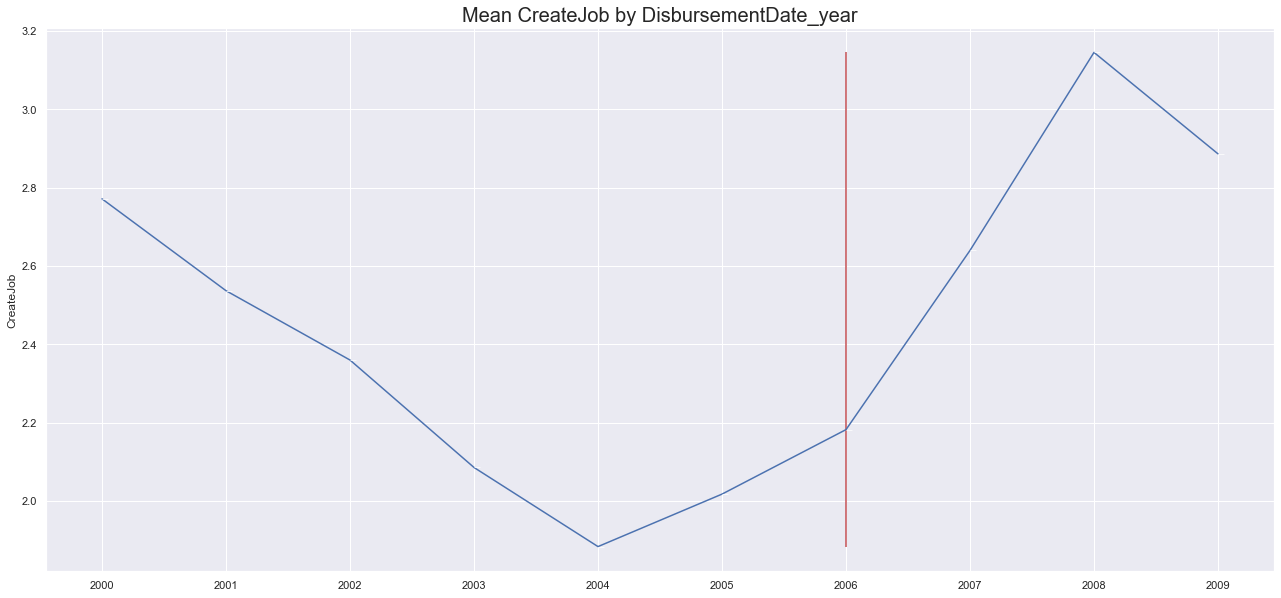

,CreateJob,RetainedJob,USDPerJobCreated,Job
2000,2.771,5.450,115998.052,8.221
2001,2.537,5.897,110927.083,8.434
2002,2.360,5.625,104813.345,7.984
2003,2.085,5.444,85562.026,7.529
2004,1.883,4.787,84198.263,6.670
2005,2.017,5.495,81363.300,7.512
2006,2.182,5.576,77451.649,7.758
2007,2.639,5.606,73459.319,8.245
2008,3.145,6.027,76792.757,9.172
2009,2.886,7.633,81797.256,10.519


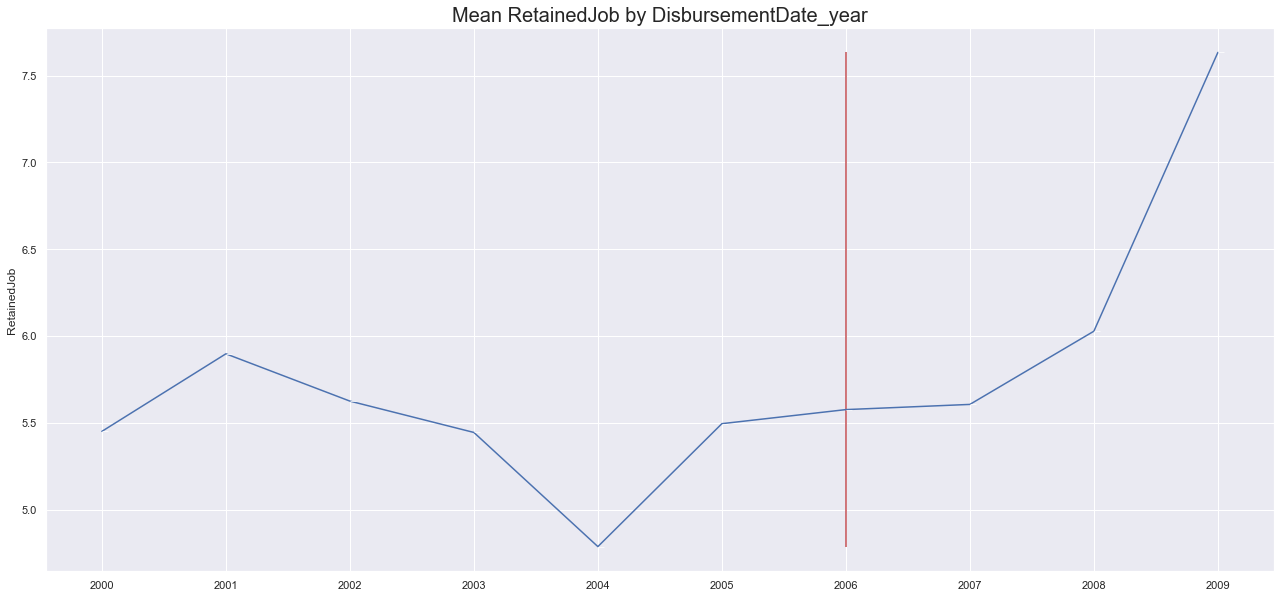

,CreateJob,RetainedJob,USDPerJobCreated,Job
2000,2.771,5.450,115998.052,8.221
2001,2.537,5.897,110927.083,8.434
2002,2.360,5.625,104813.345,7.984
2003,2.085,5.444,85562.026,7.529
2004,1.883,4.787,84198.263,6.670
2005,2.017,5.495,81363.300,7.512
2006,2.182,5.576,77451.649,7.758
2007,2.639,5.606,73459.319,8.245
2008,3.145,6.027,76792.757,9.172
2009,2.886,7.633,81797.256,10.519


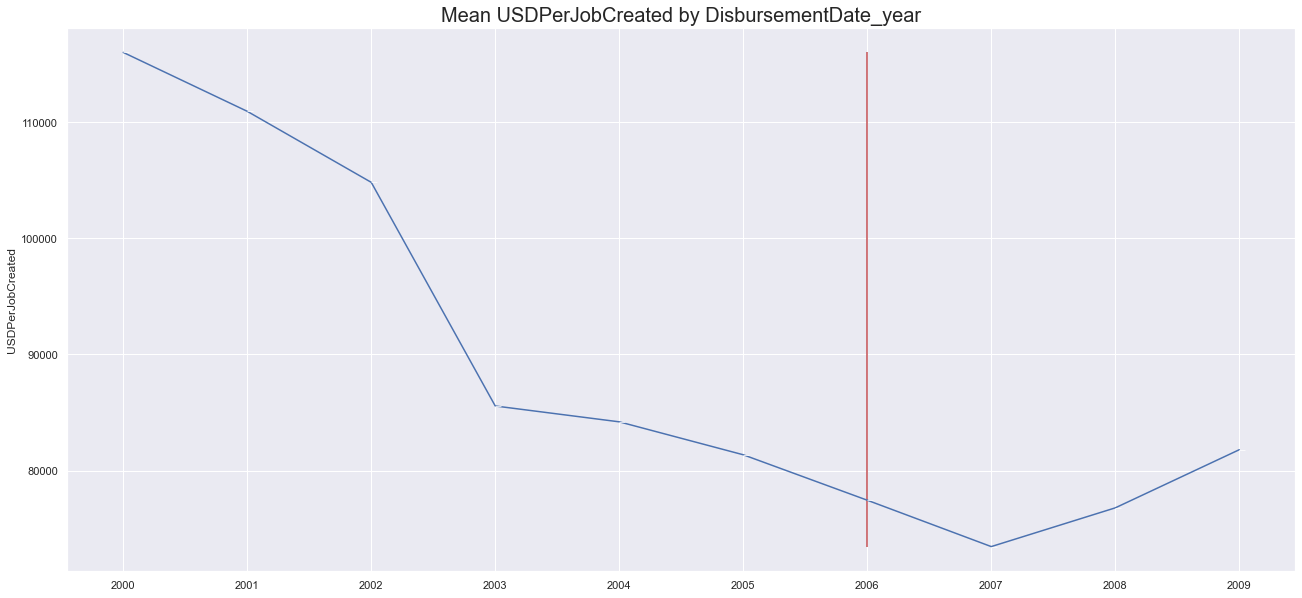

,CreateJob,RetainedJob,USDPerJobCreated,Job
2000,2.771,5.450,115998.052,8.221
2001,2.537,5.897,110927.083,8.434
2002,2.360,5.625,104813.345,7.984
2003,2.085,5.444,85562.026,7.529
2004,1.883,4.787,84198.263,6.670
2005,2.017,5.495,81363.300,7.512
2006,2.182,5.576,77451.649,7.758
2007,2.639,5.606,73459.319,8.245
2008,3.145,6.027,76792.757,9.172
2009,2.886,7.633,81797.256,10.519


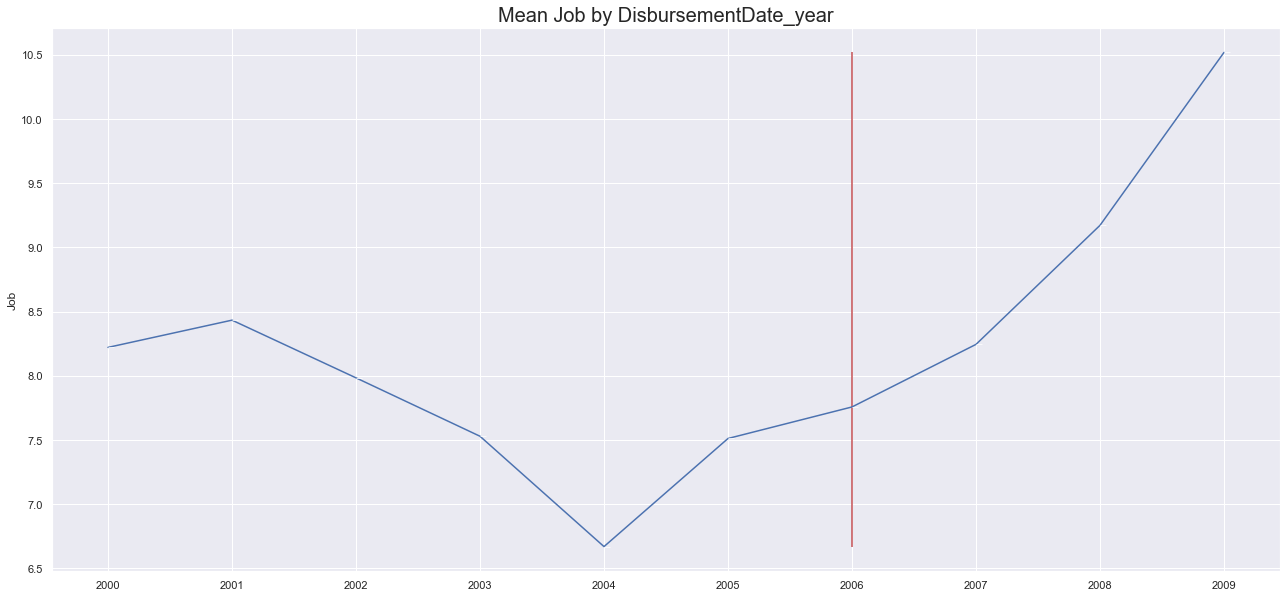

,CreateJob,RetainedJob,USDPerJobCreated,Job
2000,2.771,5.450,115998.052,8.221
2001,2.537,5.897,110927.083,8.434
2002,2.360,5.625,104813.345,7.984
2003,2.085,5.444,85562.026,7.529
2004,1.883,4.787,84198.263,6.670
2005,2.017,5.495,81363.300,7.512
2006,2.182,5.576,77451.649,7.758
2007,2.639,5.606,73459.319,8.245
2008,3.145,6.027,76792.757,9.172
2009,2.886,7.633,81797.256,10.519


In [43]:
year_col_visualization(df_copy, num_features=['CreateJob', 'RetainedJob', 'USDPerJobCreated', 'Job'], year_col='DisbursementDate_year')

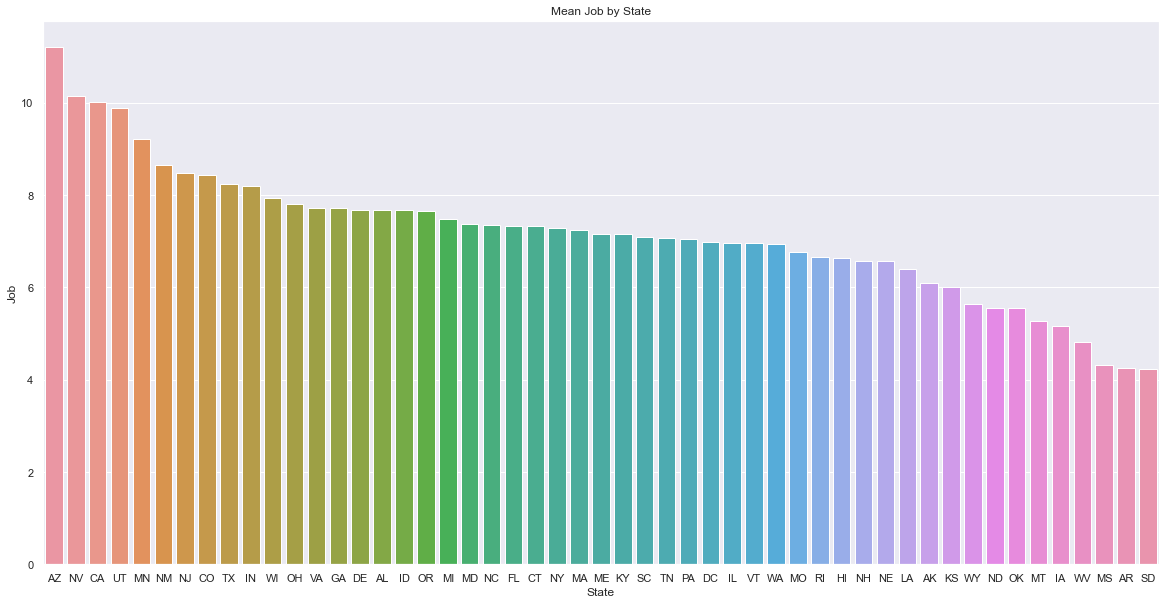

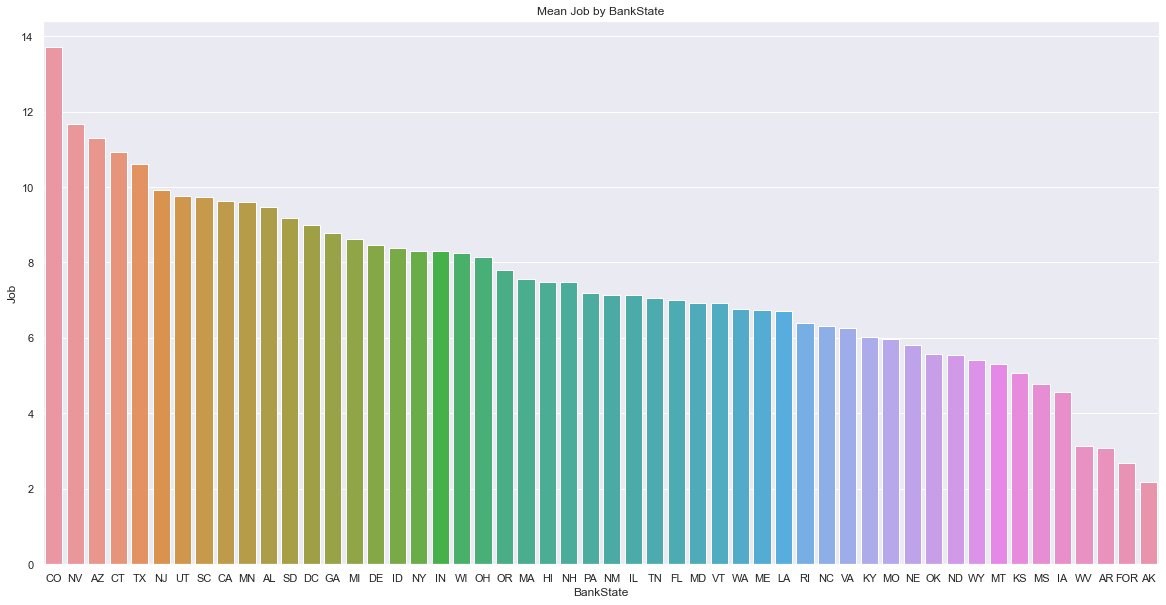

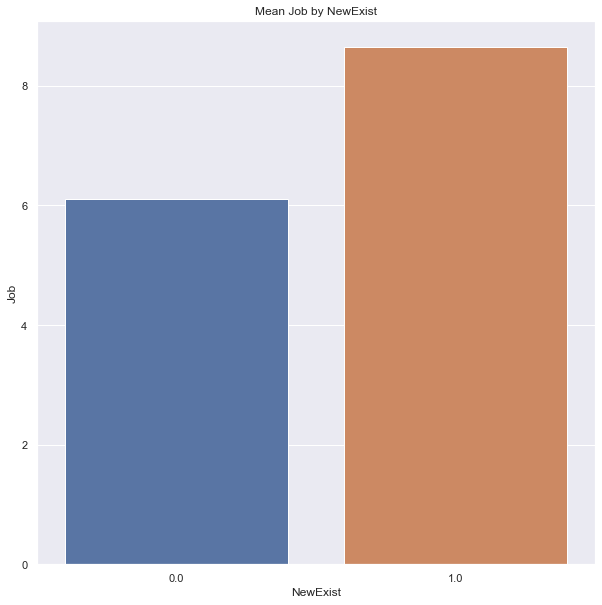

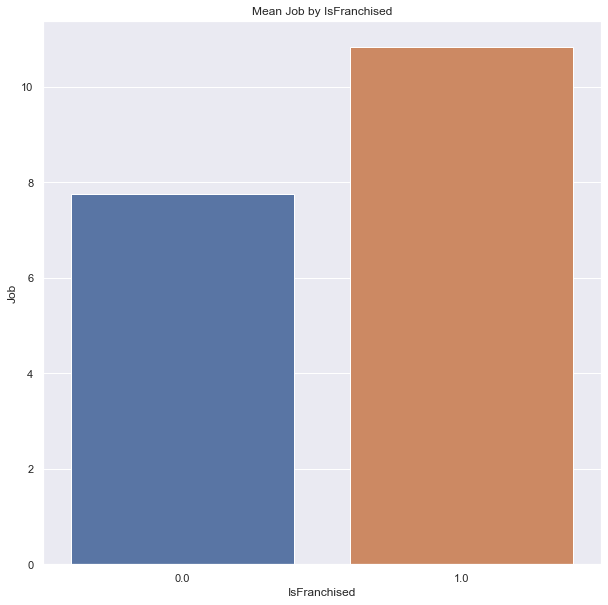

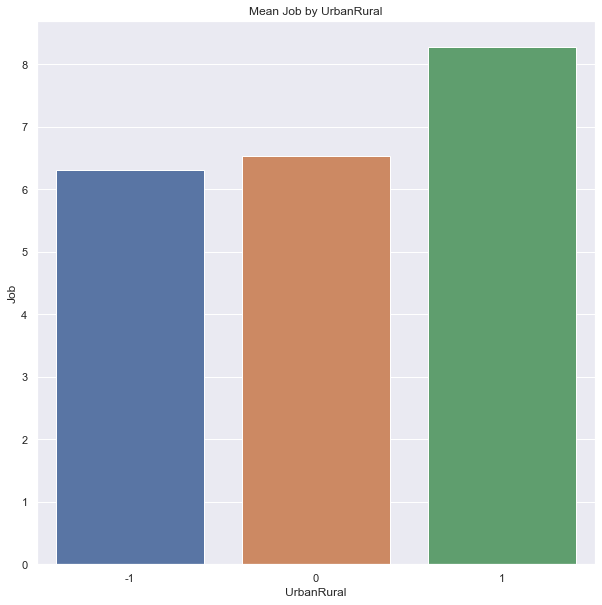

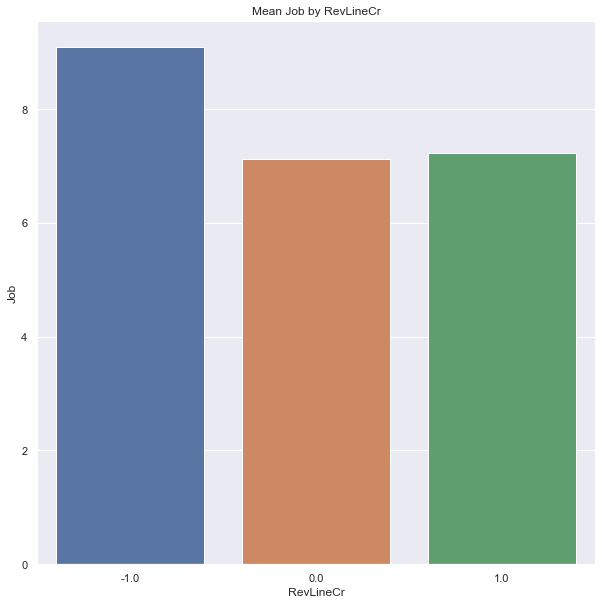

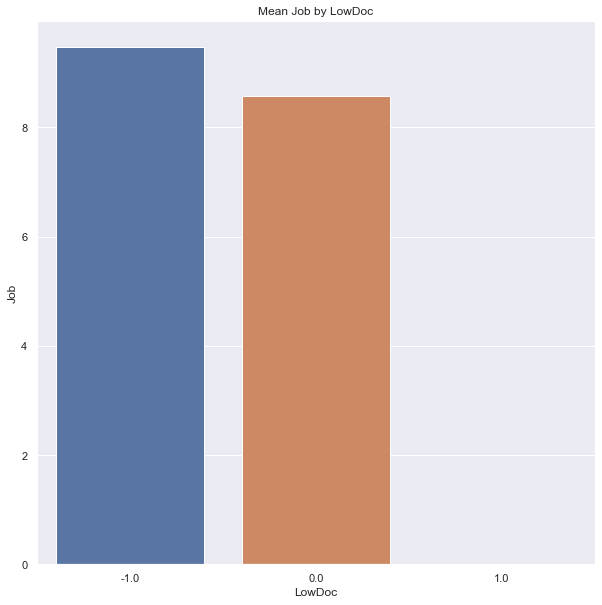

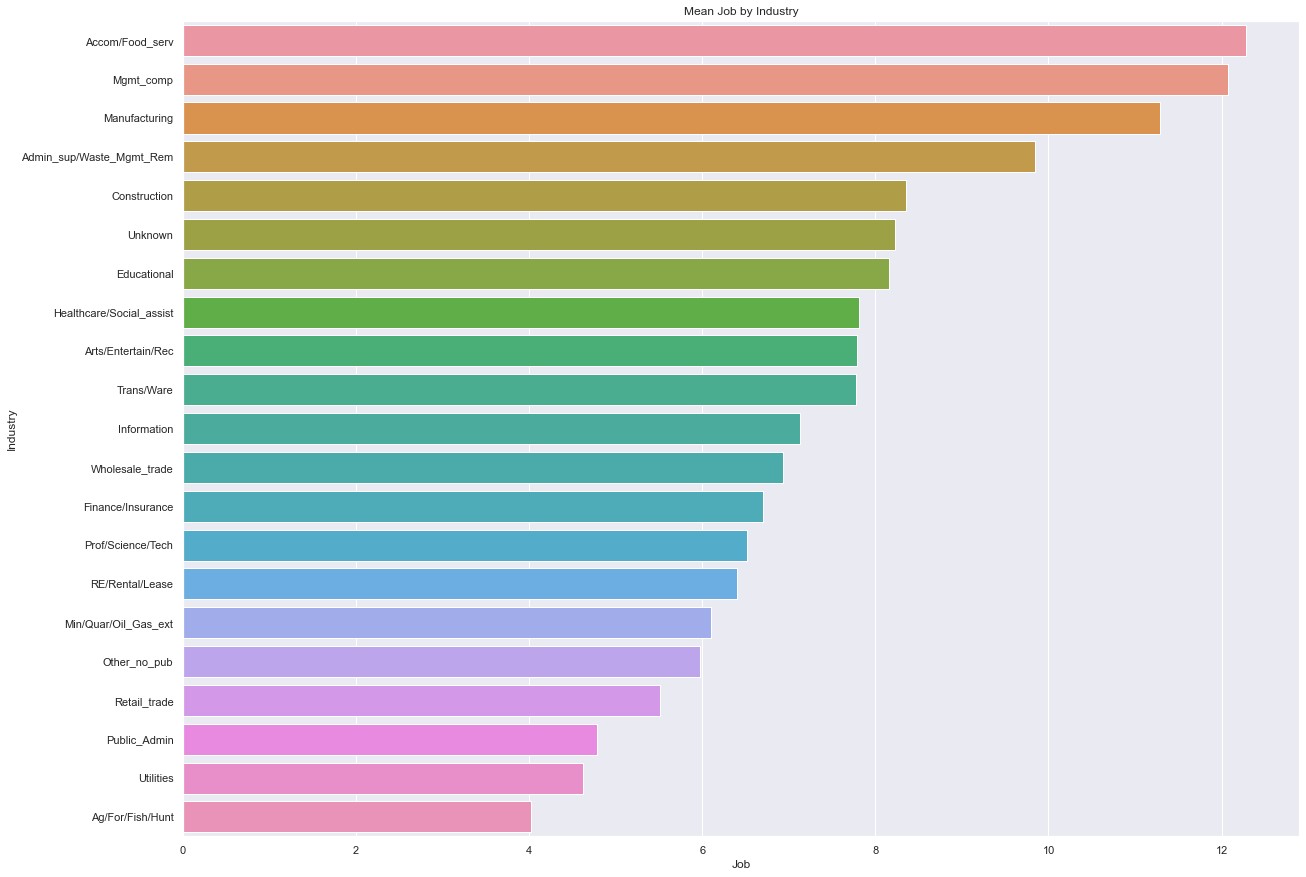

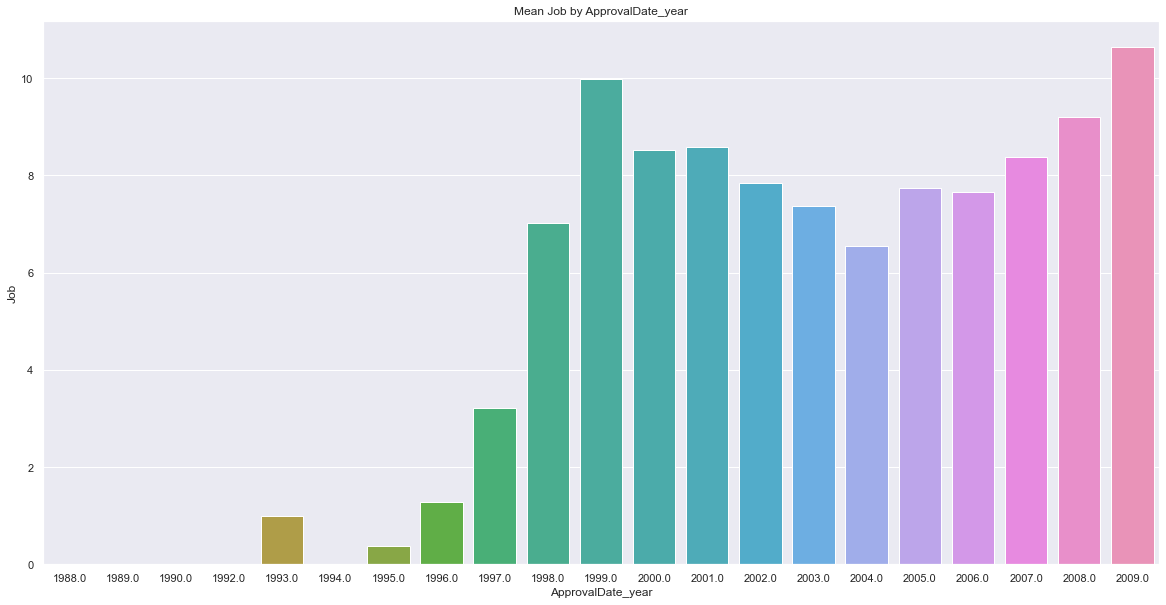

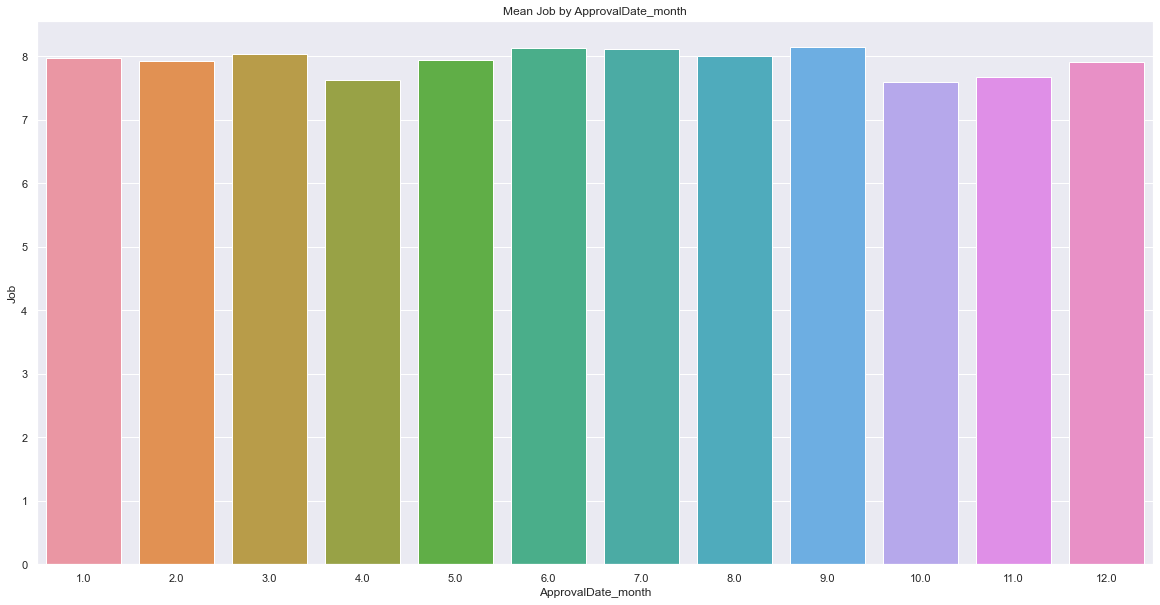

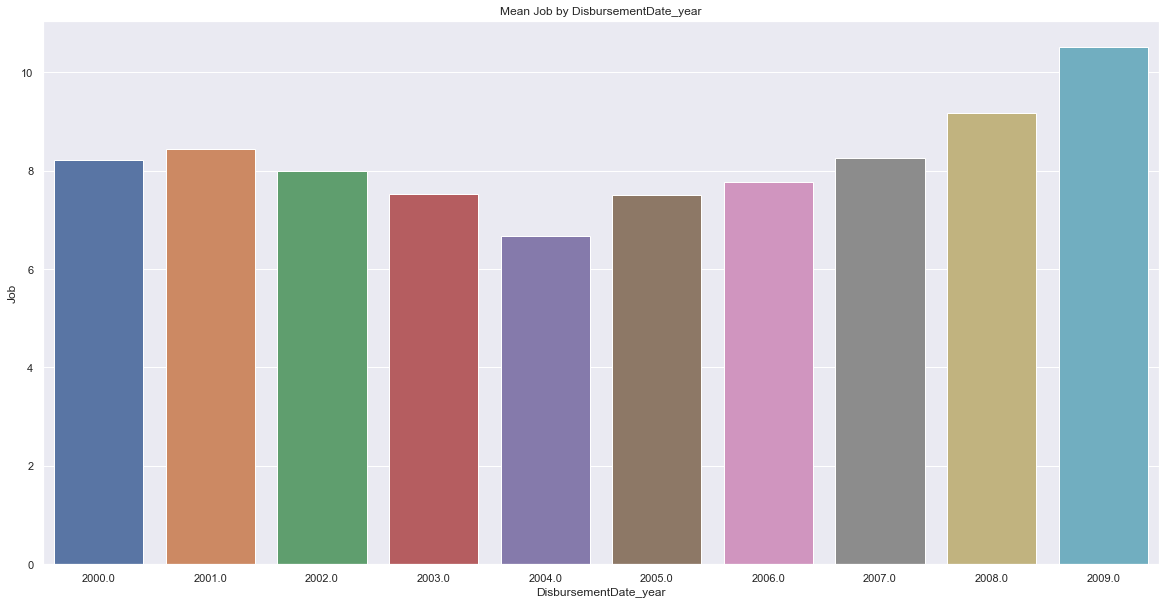

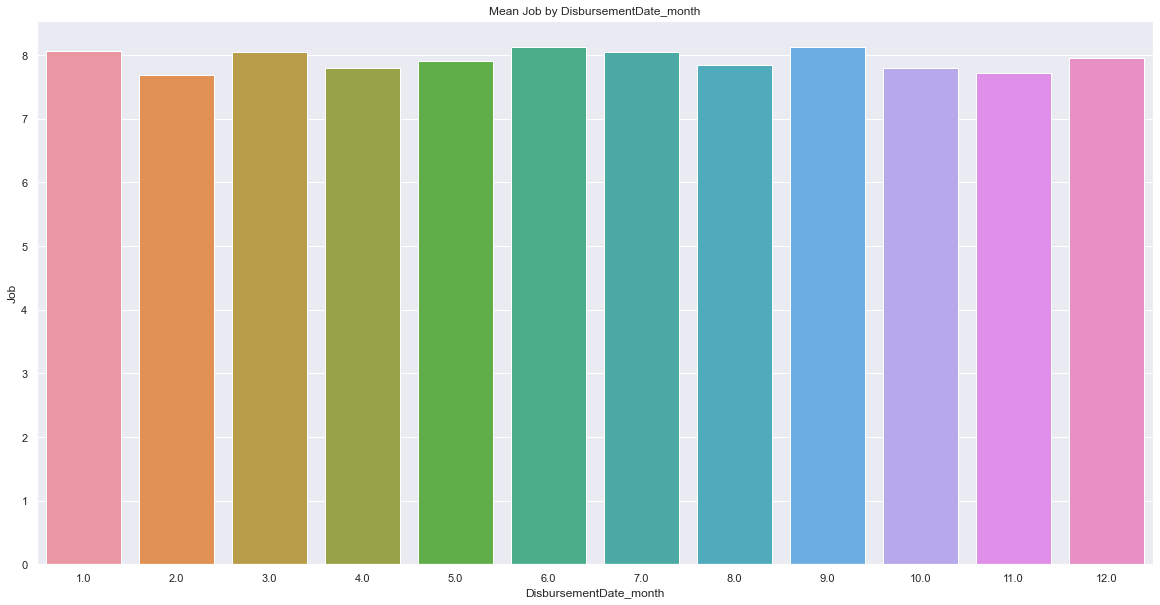

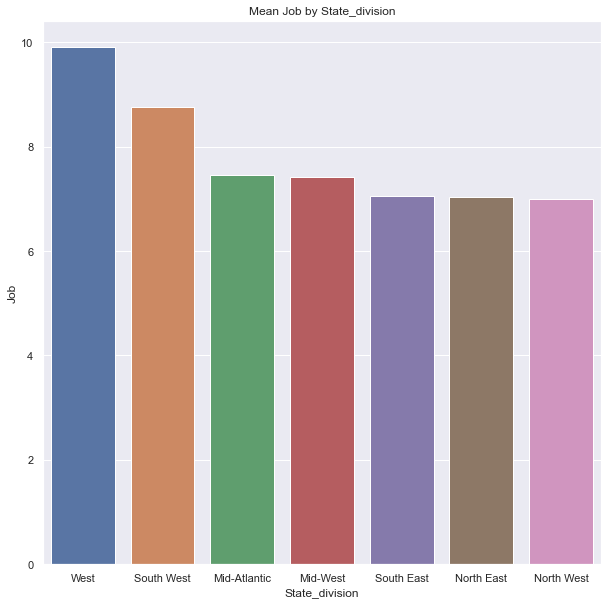

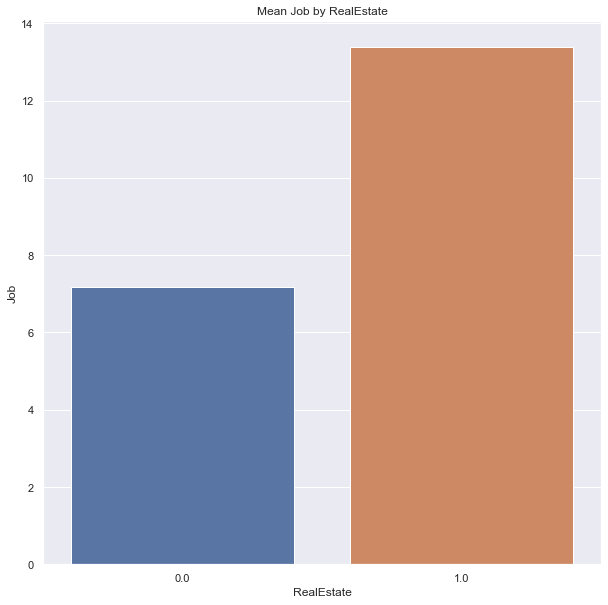

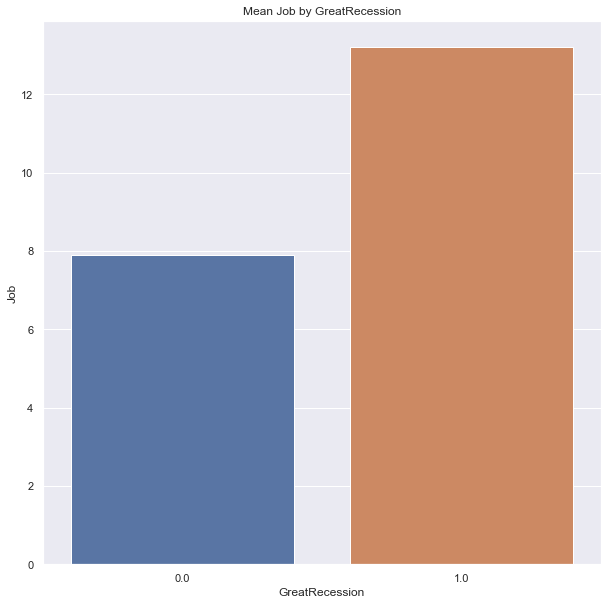

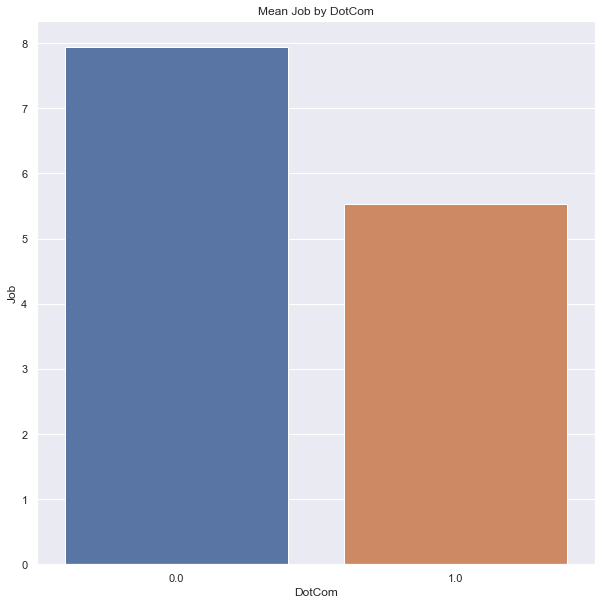

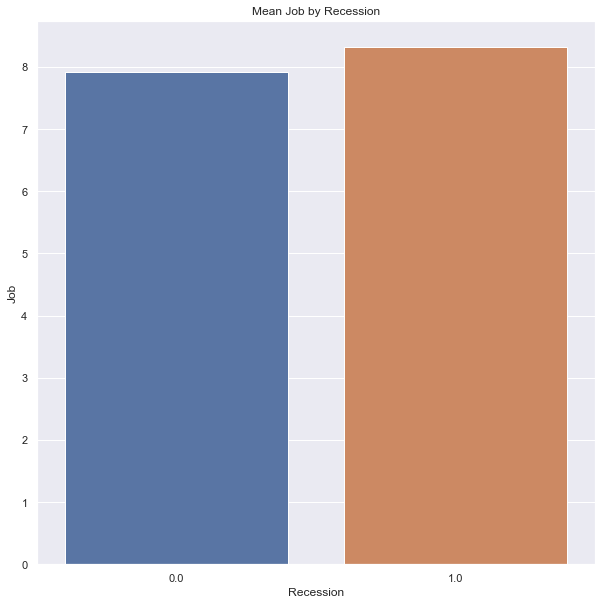

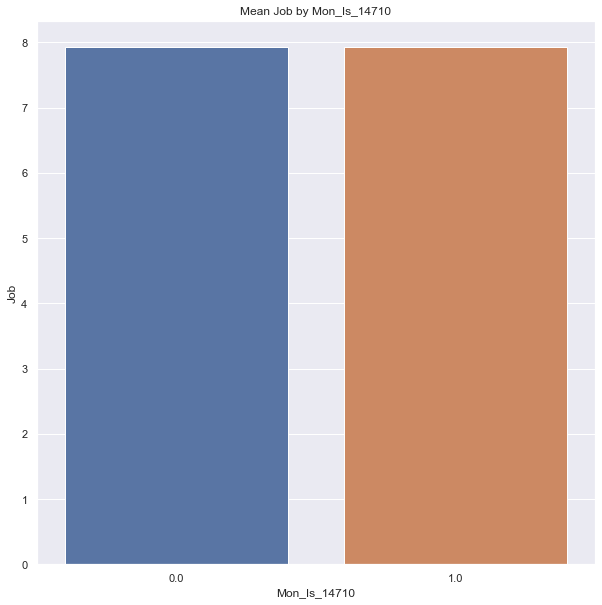

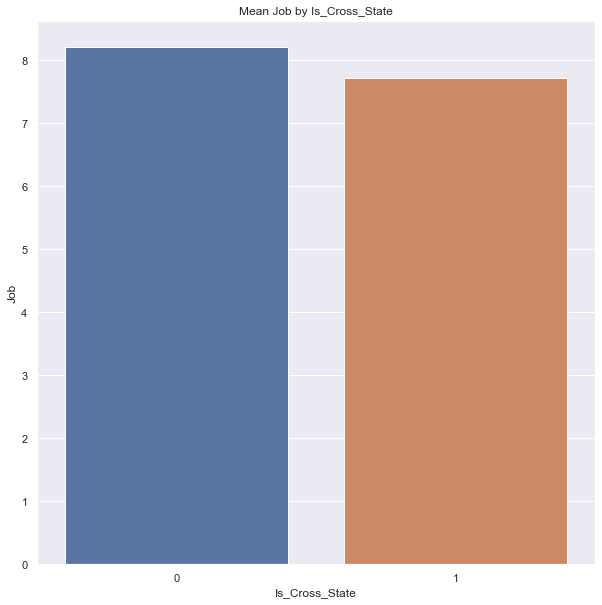

In [44]:
num = 'Job'
for i in range(len(obj_features)):
    if obj_features[i] == 'Bank':
        continue
    if df_copy[obj_features[i]].nunique() < 8:
            plt.figure(figsize=(10, 10))
    elif obj_features[i] == 'Industry':
        plt.figure(figsize=(20, 15))
        vis = df_groupby_mean[obj_features[i]].sort_values(by=num, ascending=False)
        title = 'Mean {} by {}'.format(num, obj_features[i])
        plt.title(title)
        sns.set_theme(style="darkgrid")
        plt.grid(True)
        sns.barplot(y=vis.index, x=vis[num])
        plt.savefig(title + '.jpeg')
        plt.show()
        continue
    else:
        plt.figure(figsize=(20, 10))
    vis = df_groupby_mean[obj_features[i]].sort_values(by=num, ascending=False)
    title = 'Mean {} by {}'.format(num, obj_features[i])
    plt.title(title)
    sns.set_theme(style="darkgrid")
    plt.grid(True)
    sns.barplot(x=vis.index, y=vis[num])
    plt.savefig(title + '.jpeg')
    plt.show()

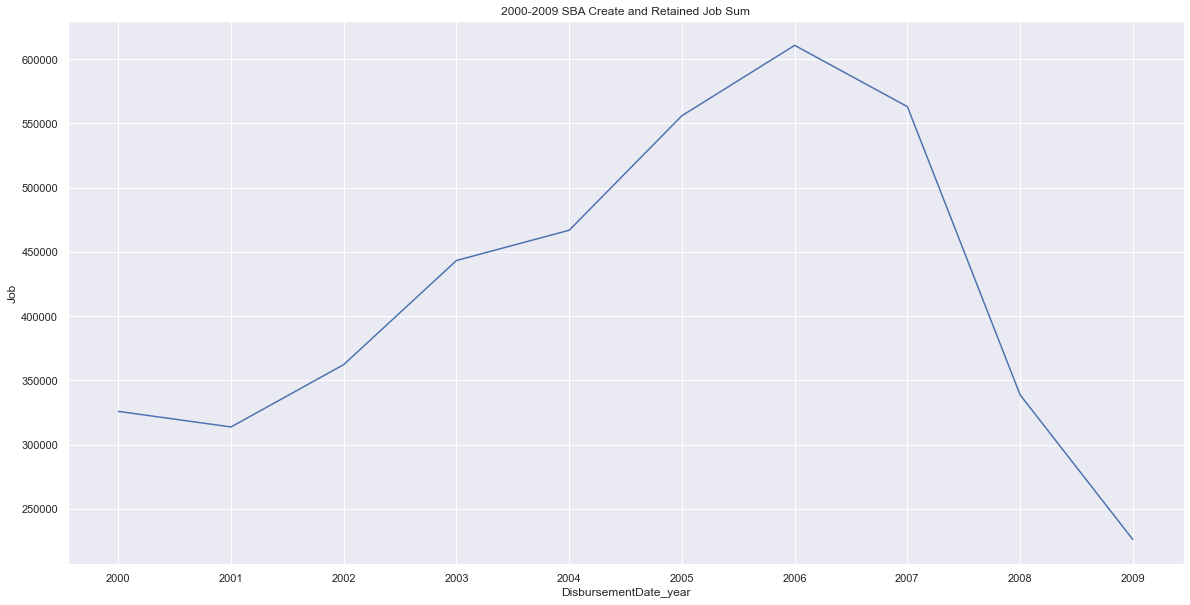

In [57]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=pd.DataFrame(df_groupby_sum['DisbursementDate_year']['Job']).reset_index(), x='DisbursementDate_year', y='Job')
plt.xticks(pd.DataFrame(df_groupby_sum['DisbursementDate_year']['Job']).reset_index()['DisbursementDate_year'])
title = '2000-2009 SBA Create and Retained Job Sum'
plt.title(title)
plt.savefig('{}.jpeg'.format(title))
plt.show()

In [64]:
pd.DataFrame(df_groupby_sum['DisbursementDate_year'][['CreateJob', 'RetainedJob', 'Job', 'SBALoss']])

,CreateJob,RetainedJob,Job,SBALoss
DisbursementDate_year,,,,
2000.000,109822.000,215998.000,325820.000,707161540.521
2001.000,94347.000,219341.000,313688.000,637306148.198
2002.000,107046.000,255179.000,362225.000,578801632.265
2003.000,122750.000,320475.000,443225.000,574431520.817
2004.000,131791.000,334978.000,466769.000,782748301.357
2005.000,149276.000,406617.000,555893.000,1166419170.583
2006.000,171742.000,438882.000,610624.000,1643508741.501
2007.000,180210.000,382737.000,562947.000,1719281929.606
2008.000,116118.000,222538.000,338656.000,837832490.939


In [65]:
pd.DataFrame(df_groupby_sum['DisbursementDate_year']['SBALoss'])

,SBALoss
DisbursementDate_year,
2000.000,707161540.521
2001.000,637306148.198
2002.000,578801632.265
2003.000,574431520.817
2004.000,782748301.357
2005.000,1166419170.583
2006.000,1643508741.501
2007.000,1719281929.606
2008.000,837832490.939


In [74]:
%run function.ipynb

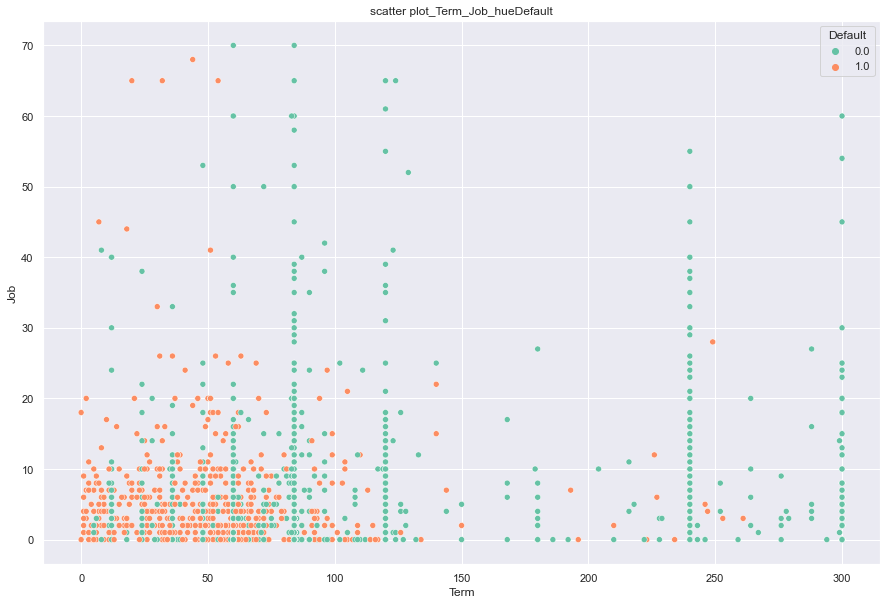

In [76]:
scatter_plot_with_hue(df=df_copy, x_axis="Term", y_axis="Job", hue_col='Default', exclude_outlier=1)

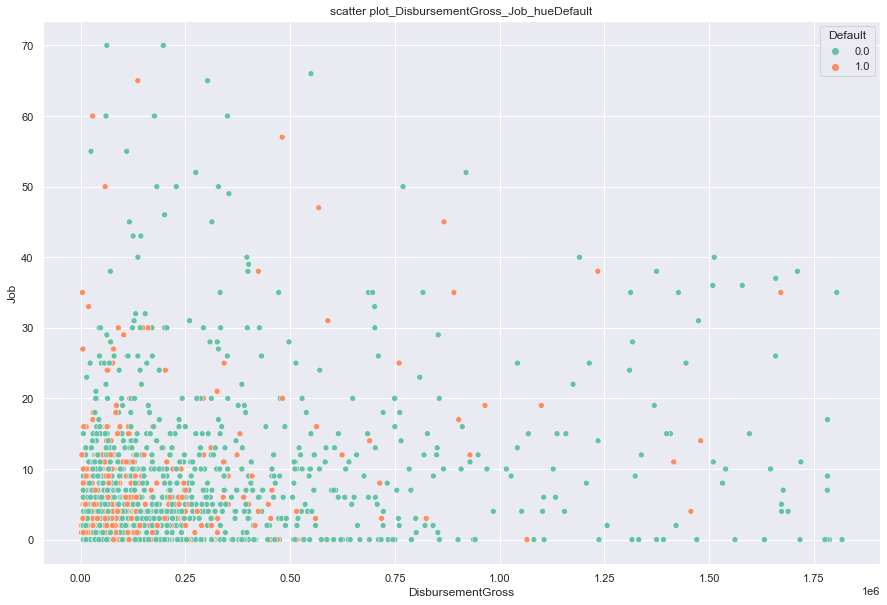

In [77]:
scatter_plot_with_hue(df=df_copy, x_axis="DisbursementGross", y_axis="Job", hue_col='Default', exclude_outlier=1)

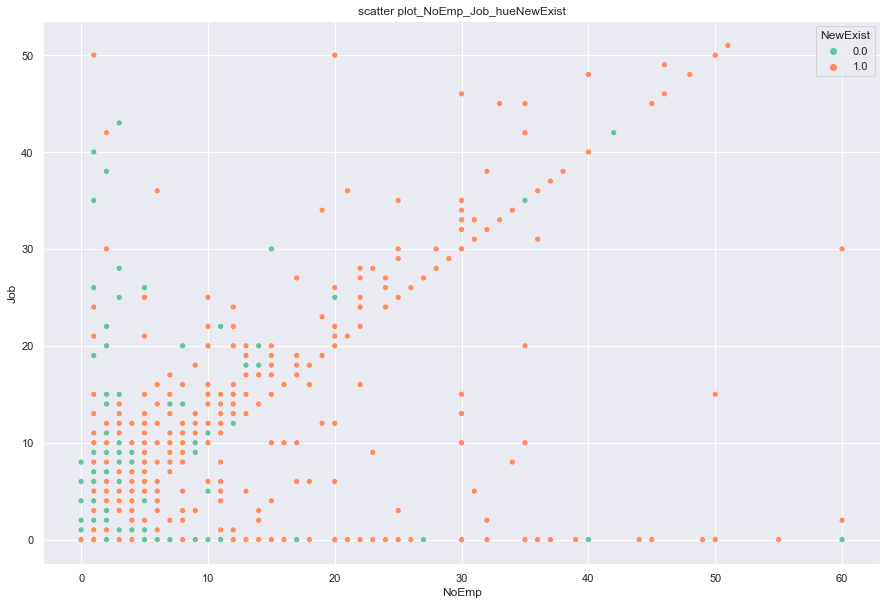

In [78]:
scatter_plot_with_hue(df=df_copy, x_axis="NoEmp", y_axis="Job", hue_col='NewExist', exclude_outlier=1)